<a href="https://colab.research.google.com/github/sourav03dutta/YES-Bank-Stock-Closing-Price-Prediction/blob/main/YES_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **YES Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **NAME**   - **SOURAV DUTTA**, Cohort Montreal, ALMABETTER

# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor.  The main objective is to predict the stock’s closing price of the month.

We will import NumPy, pandas, matplotlib, seaborn, plotly.express, sklearn models and other librarires in Google Colab then mount the drive. After that we will read csv file from working directory path and assigned it into the data
frame.

This dataset has monthly stock prices of the bank since its inception and includes closing, opening, highest, and lowest stock prices of every month.

Date - Date of record

Open - Opening price of the stock in a day

High - High price of the stock in a day

Low - Low price of the stock in a day

Close - Closing price of the stock in a day


The main objective is to predict the stock’s closing price of the month.

In this dataset, there are 185 rows and 5 columns. The dataset contains no duplicate values and null values or missing values. Then checked for unique values, changed date (Month-Year) to proper Date (Year- Month-Day)and after that added three more columns further to describe Date in proper way as 'Year', 'Month', 'Day'.

After Data Wrangling, Exploratory Data Analysis is done to get data visualization and deeper insights of the datasets. Correlation heatmap is plotted to check multicollinearity of the datasets and then plotted Pair plot.

In feature engineering, feature selection is done. Then train test split, Implementation of Supervised regression model with cross validation and hyperparameter tuning.

For further deeper insights time series analysis is also being implemented.

Conclusion:-

1. We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.

2. A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.

3. Additional features were engineered by reducing the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.

4. The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.

5. Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.









# **GitHub Link -**

https://github.com/sourav03dutta/YES-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**



Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import missingno as msno
from numpy import math
from datetime import datetime
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import (train_test_split, GridSearchCV )               
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, ElasticNet)
from sklearn.metrics import (mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score)
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

working_dir_path = '/content/drive/My Drive/Almabetter Projects/Machine Learning - Regression/YES Bank Stock Closing Price Prediction/'
Stock_Data = pd.read_csv(working_dir_path + 'data_YesBank_StockPrices.csv' , encoding='latin-1')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look

Stock_Data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

Stock_Data.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info

Stock_Data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

Stock_Data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

Stock_Data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

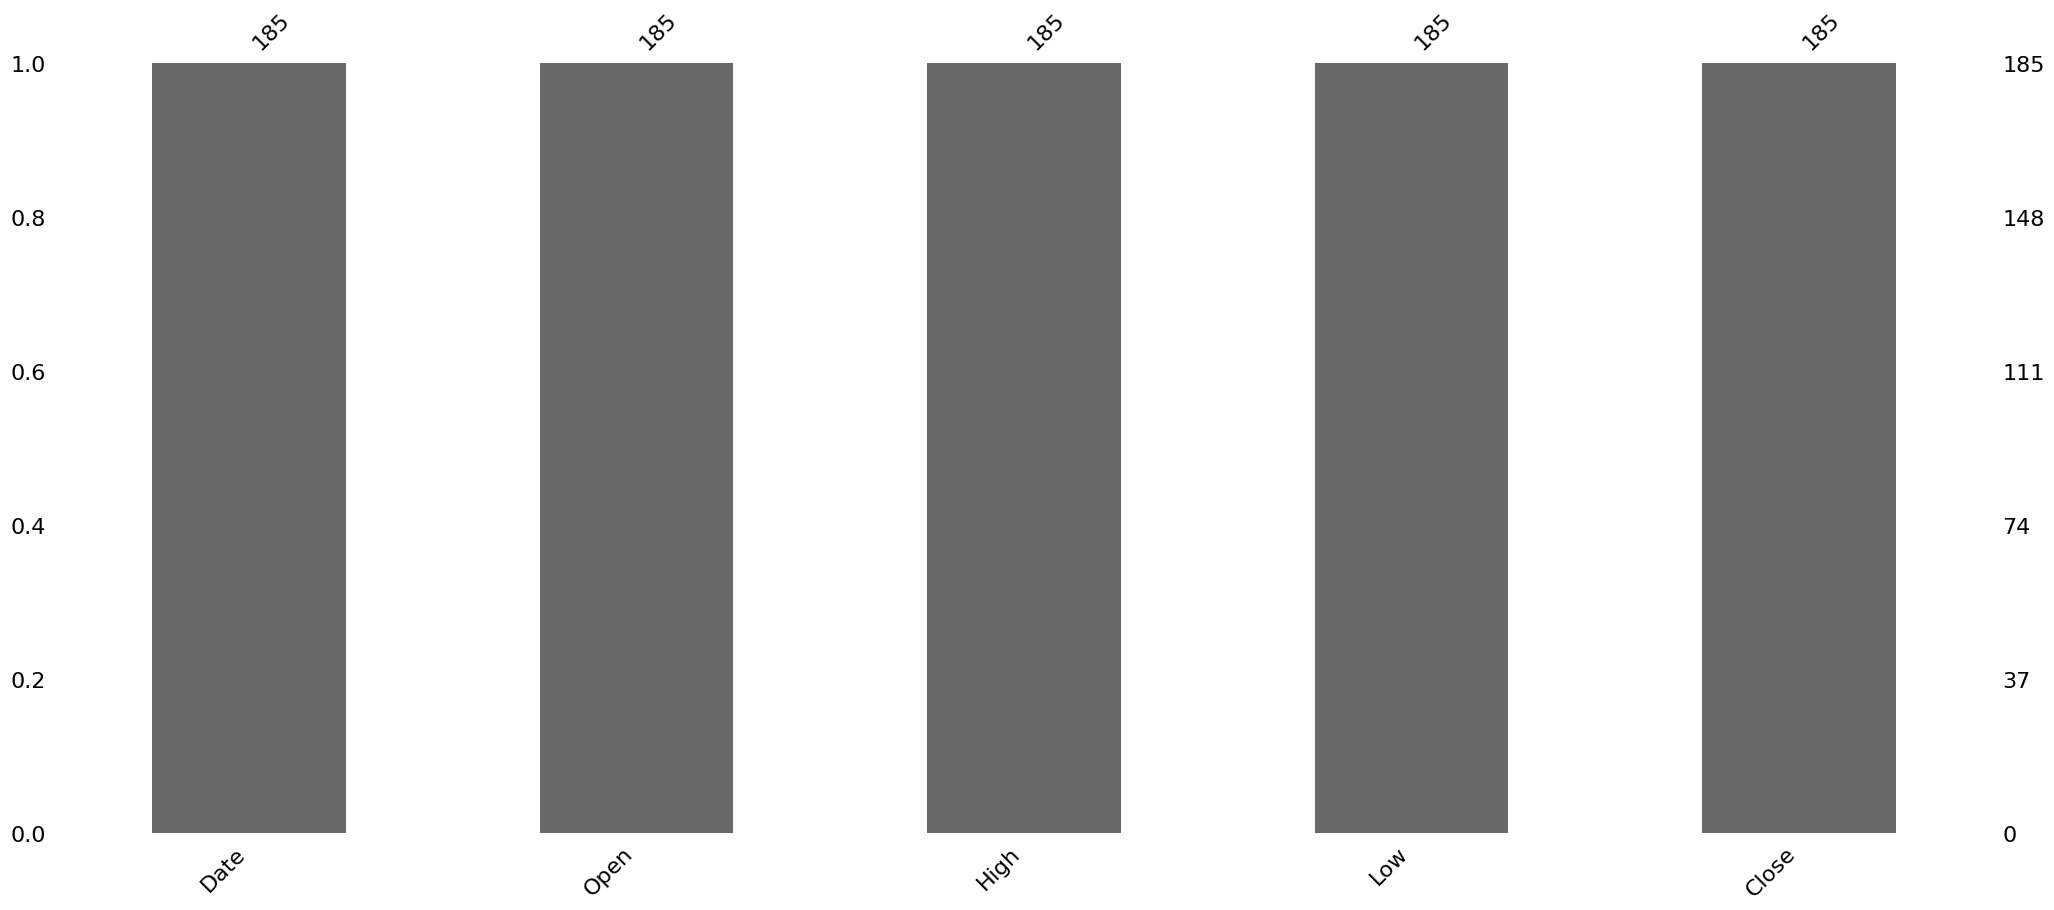

In [ ]:
# Visualizing the missing values

msno.bar(Stock_Data)

### What did you know about your dataset?

The dataset is all about Yes bank stock price which includes monthly date of record, opening price, high price, low price and closing price. In this dataset, there are 185 rows and 5 columns. The dataset contains no duplicate values and null values or missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

Stock_Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe

Stock_Data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Date - Date of record

Open - Opening price of the stock in a day

High - High price of the stock in a day

Low - Low price of the stock in a day

Close - Closing price of the stock in a day


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

print(f"Unique Values present in Open_Column are : {Stock_Data['Open'].unique()}\n\n")
print(f"Unique Values present in High_Column are : {Stock_Data['High'].unique()}\n\n")
print(f"Unique Values present in Low_Column are : {Stock_Data['Low'].unique()}\n\n")
print(f"Unique Values present in Close_Column are : {Stock_Data['Close'].unique()}\n\n")

Unique Values present in Open_Column are : [ 13.    12.58  13.48  13.2   13.35  13.49  13.68  15.5   16.2   20.56
  19.8   18.2   16.    15.9   18.    18.78  22.8   25.4   27.4   30.2
  29.3   27.    30.66  33.89  35.98  37.5   37.4   41.8   44.4   46.4
  49.99  50.88  48.9   33.9   34.3   31.22  22.85  25.    26.68  24.6
  14.79  12.4   15.28  12.19  10.    10.04  15.94  25.6   29.7   31.98
  33.8   41.2   46.58  50.98  53.6   49.    47.8   50.67  56.94  56.7
  53.55  59.4   62.8   70.9   72.2   61.8   62.98  53.    51.84  62.
  61.26  60.4   63.    62.9   56.    53.8   62.2   57.    47.92  65.9
  69.    73.62  70.4   65.45  68.15  73.    66.2   76.4   82.54  89.2
  93.2  104.41  94.    85.7  100.99  99.    92.4   66.    49.2   58.
  74.    74.4   74.74  61.54  60.52  83.45  88.8  114.8  108.43 107.4
 114.6  112.1  137.1  142.08 154.4  172.5  174.8  162.8  170.   177.
 169.   165.9  135.61 146.96 151.73 153.   145.   150.4  138.8  172.02
 189.8  206.4  221.96 244.   273.3  253.41 255.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

Stock_Data['Date'] = pd.to_datetime(Stock_Data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))
Stock_Data['Year'] = Stock_Data['Date'].dt.year
Stock_Data['Month'] = Stock_Data['Date'].dt.month
Stock_Data['Day'] = Stock_Data['Date'].dt.day
Stock_Data = Stock_Data[['Date', 'Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close']]
Stock_Data.head()

,Date,Year,Month,Day,Open,High,Low,Close
0,2005-07-01,2005,7,1,13.00,14.00,11.25,12.46
1,2005-08-01,2005,8,1,12.58,14.88,12.55,13.42
2,2005-09-01,2005,9,1,13.48,14.87,12.27,13.30
3,2005-10-01,2005,10,1,13.20,14.47,12.40,12.99
4,2005-11-01,2005,11,1,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

1. No duplicate values.
2. No Null or missing values.
3. Checked for unique values.
4. Changed date (Month-Year) to proper Date (Year- Month-Day)
5. Added three more columns further to describe Date in proper way as 'Year', 'Month', 'Day'.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# ***Univariate Analysis***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

fig = px.box(Stock_Data, x = 'Close', points='outliers', title='Box Plot')
fig.show()


##### 1. Why did you pick the specific chart?

The specific chart is BOX PLOT. A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. 

##### 2. What is/are the insight(s) found from the chart?

The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. We can also have visual representation of outliers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We have outliers in the box plot and after further visualization of the dataset and machine learning, we can detect whether it has positive or negative impact in the dataset. 

#### Chart - 2

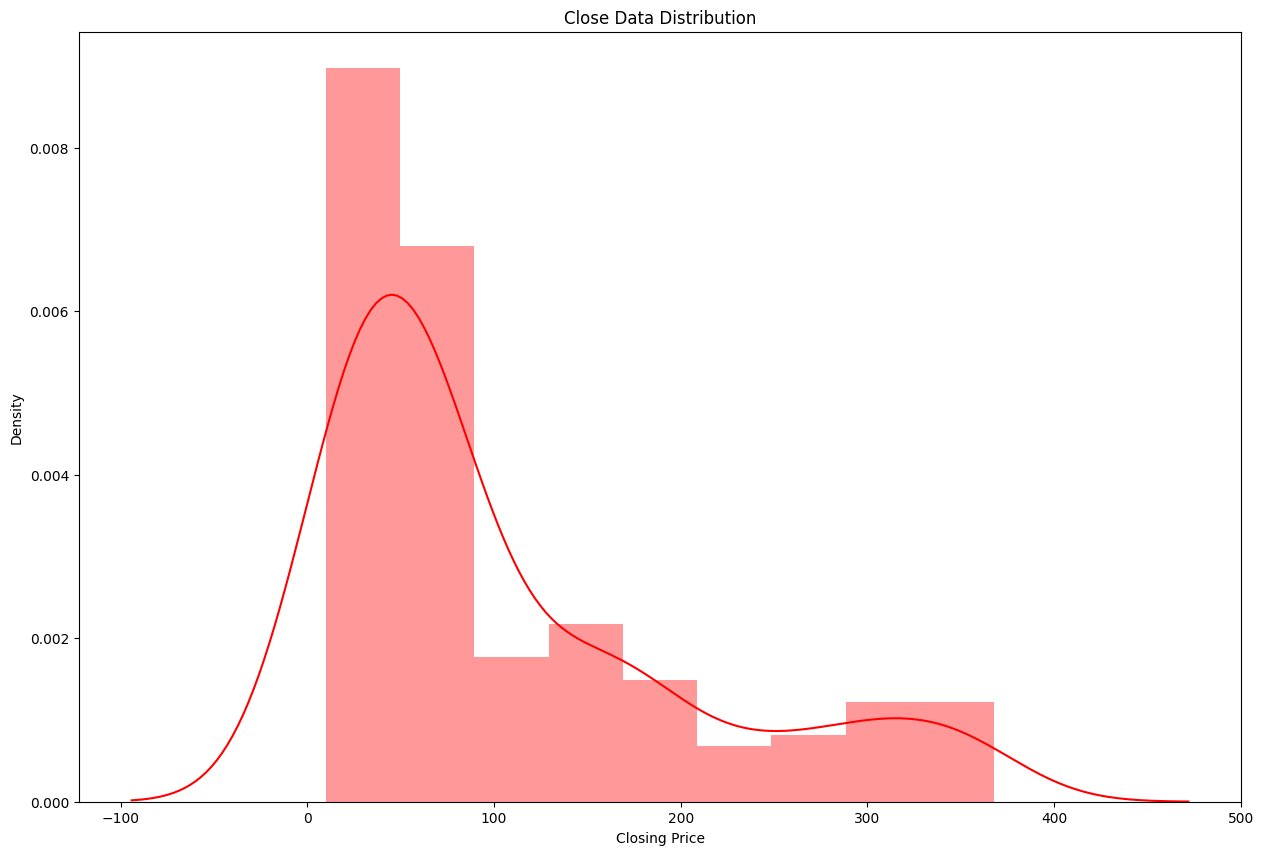

In [ ]:
# Chart - 2 visualization code

# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(Stock_Data['Close'],color="red")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

The specific chart is Histogram. The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form.

##### 2. What is/are the insight(s) found from the chart?

The distribution is right skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

'Close' is the dependent variable.

#### Chart - 3

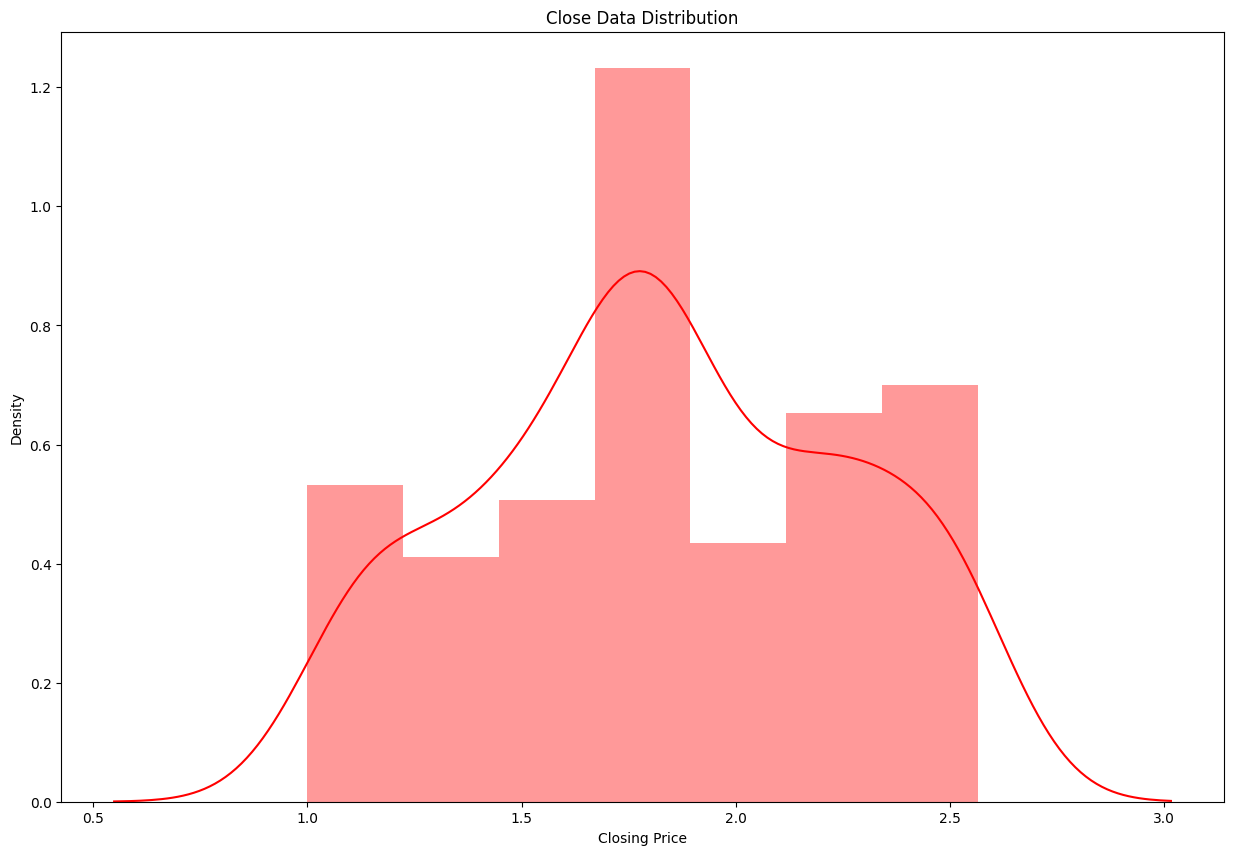

In [ ]:
# Chart - 3 visualization code

# Dependent variable 'Closing price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(Stock_Data['Close']),color="red")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

The specific chart is Normal Distrution in Histogram. The normal distribution is the proper term for a probability bell curve. 


##### 2. What is/are the insight(s) found from the chart?

Mean and Standard Deviation

#### Chart - 4

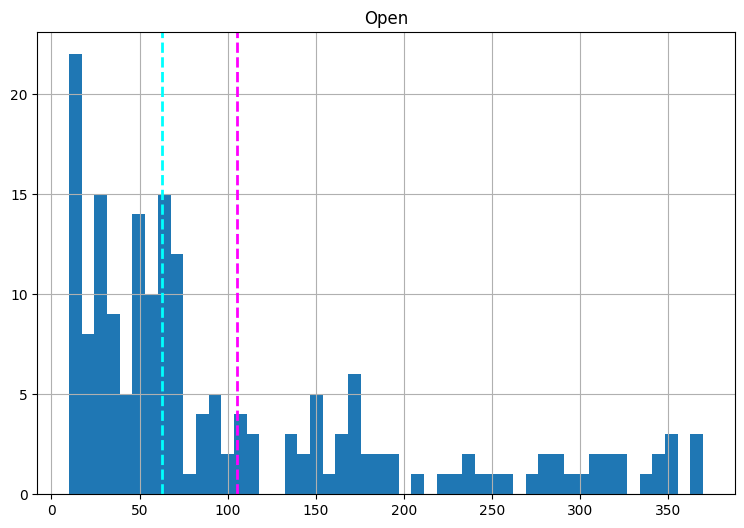

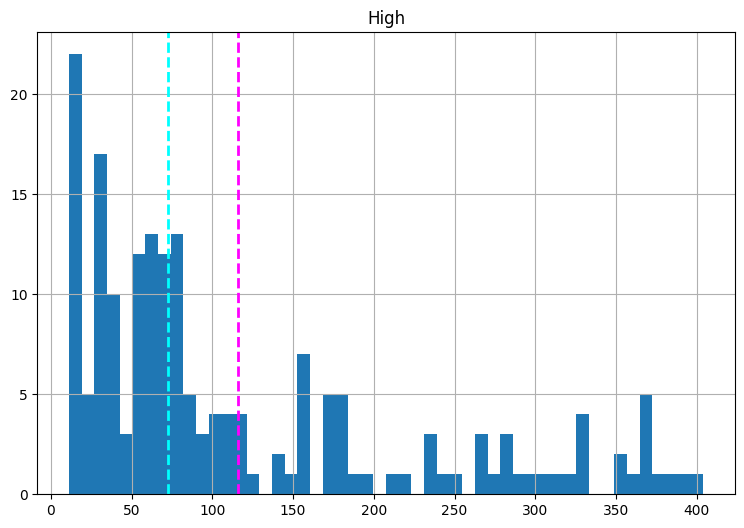

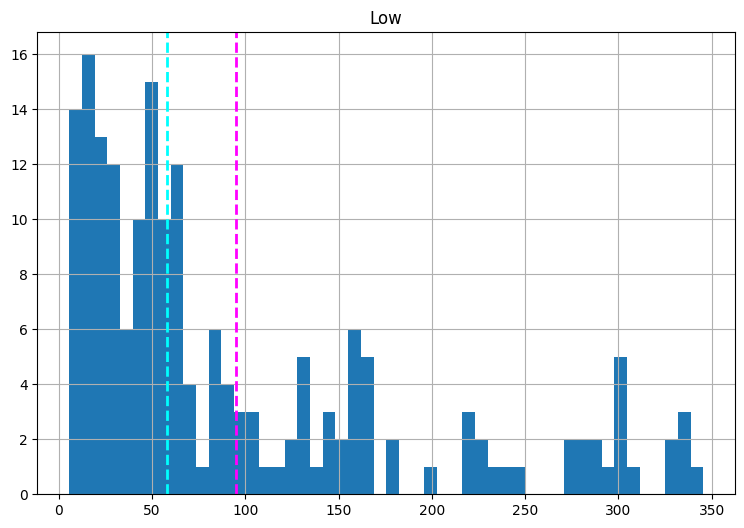

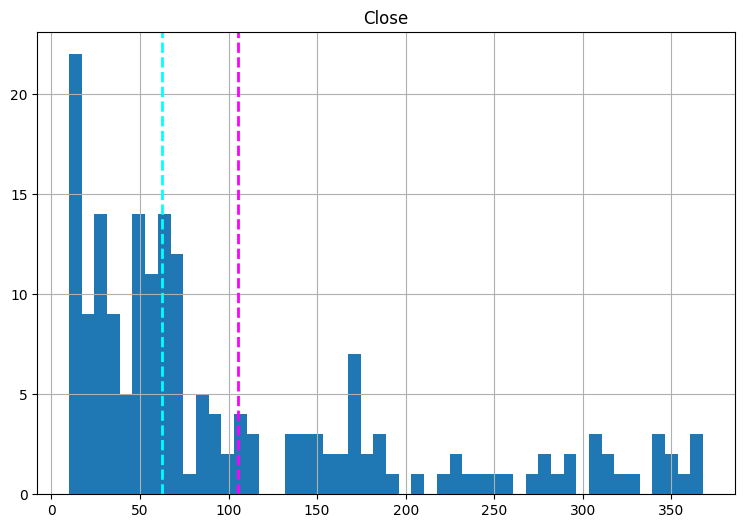

In [ ]:
# Chart - 4 visualization code

# Check for skewness in the dataset
numeric_features = Stock_Data.describe().columns
for col in numeric_features[3:7]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Stock_Data[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()



##### 1. Why did you pick the specific chart?

To check the skewness of the data in all the variables.

##### 2. What is/are the insight(s) found from the chart?

All the variables are right skewed. Mean and Median plotted on the chart.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It wiil help us to choose dependent and independent variable.

#### Chart - 5

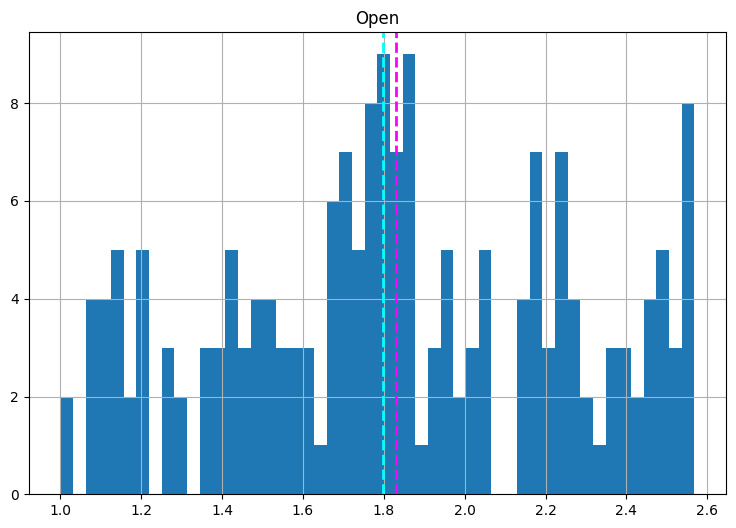

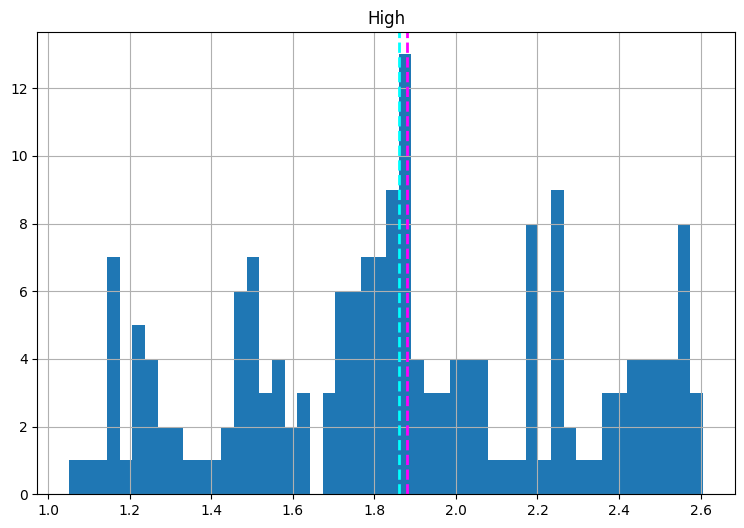

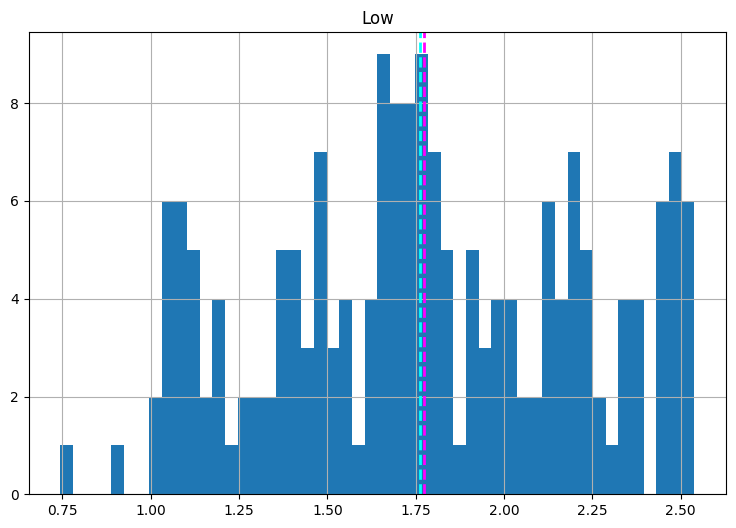

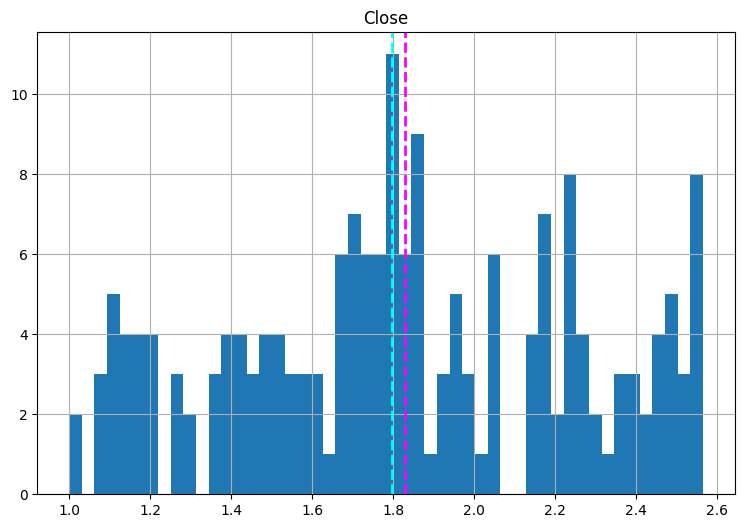

In [ ]:
# Chart - 5 visualization code

numeric_features = Stock_Data.describe().columns
for col in numeric_features[3:7]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log10(Stock_Data[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Converted log normal distribution to normal distribution

##### 2. What is/are the insight(s) found from the chart?

Mean and Median

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

'Open', 'High', 'Low' are  tentative independent variable. Further in feature engineering we will be assured by applying drop contant method.

# ***Bivariate Analysis***

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

fig = px.line(Stock_Data, Stock_Data['Date'], Stock_Data['Close'], title='Yearly Closing Price')
fig.update_layout(xaxis=dict(title='Year'), yaxis=dict(title='Close'))
fig.show()

##### 1. Why did you pick the specific chart?

A line chart is a graphical representation of an asset's historical price action that connects a series of data points with a continuous line. This is the most basic type of chart used in finance, and it typically only depicts a security's closing prices over time.

##### 2. What is/are the insight(s) found from the chart?

yearly closing price data

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The line chart clearly shows us the crash of yes bank in 2018.

#### Chart - 7

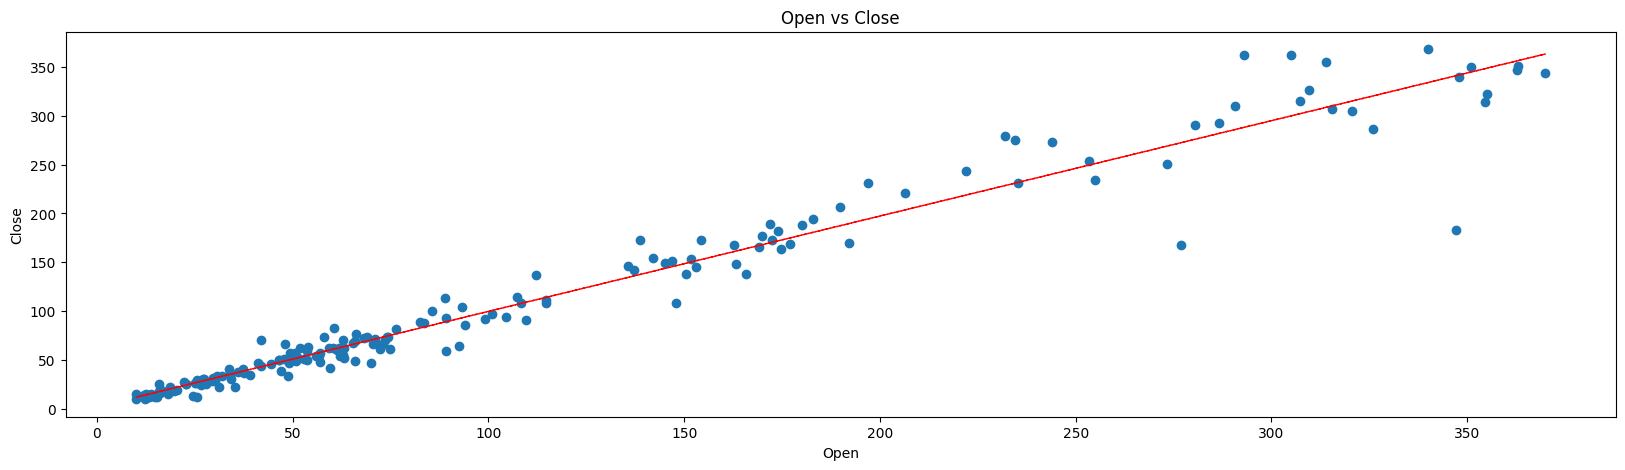

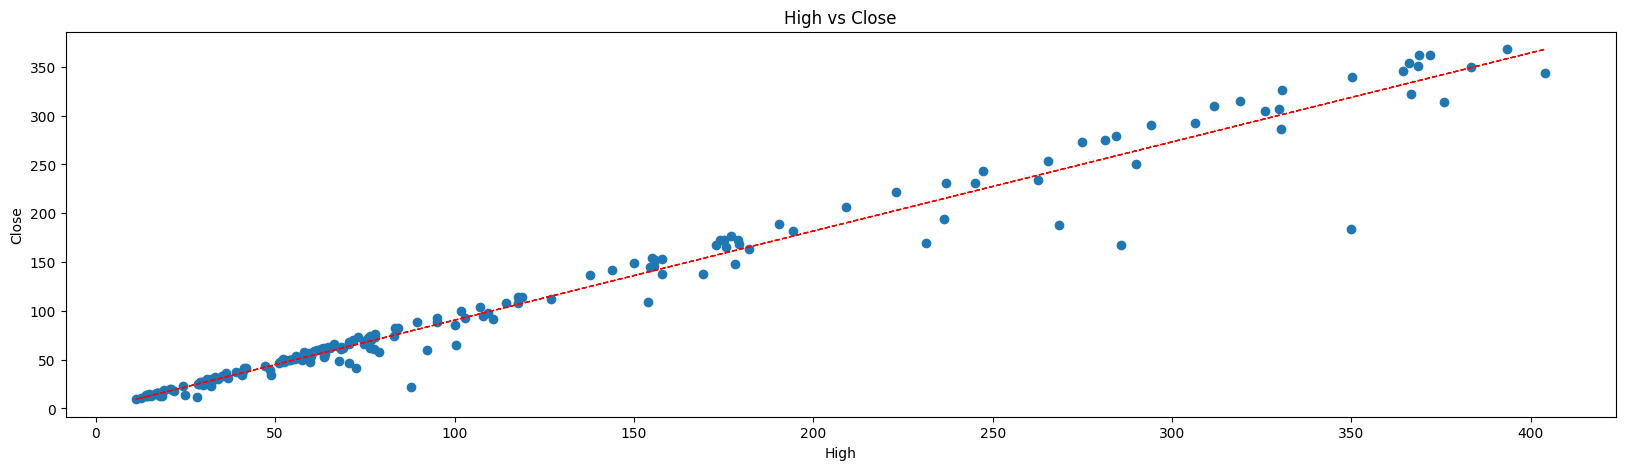

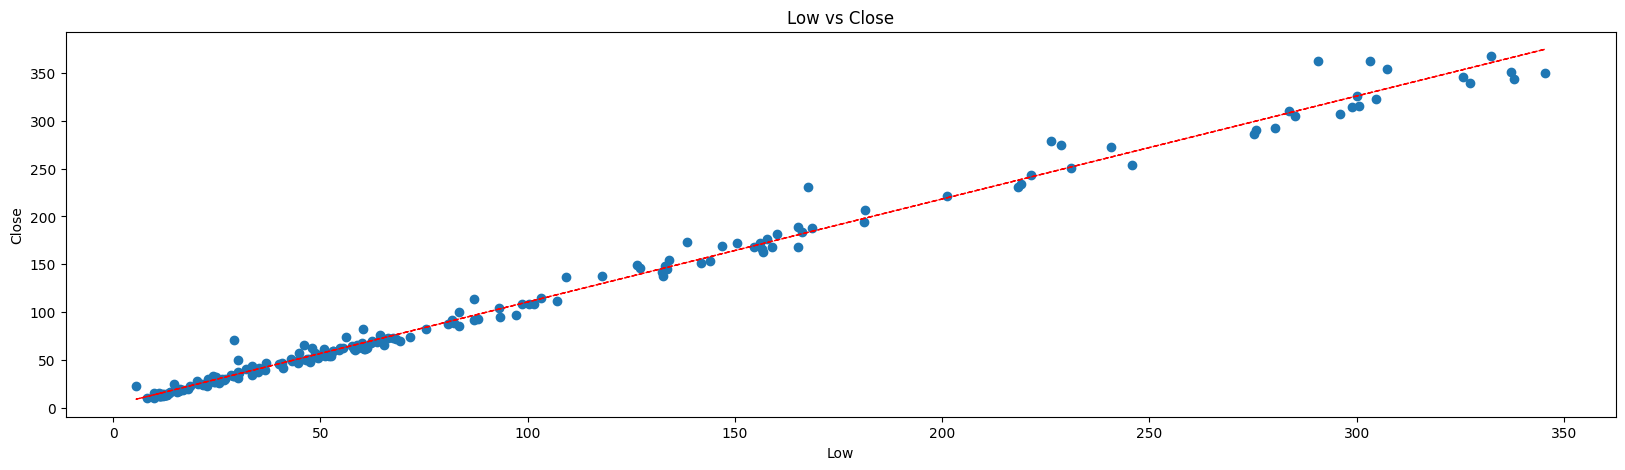

In [ ]:
# Chart - 7 visualization code

# scatter plot to see the relationship between dependent & independent variables
for col in Stock_Data.describe().columns[3:6]:
  fig = plt.figure(figsize=(20,5))
  ax = fig.gca()
  plt.scatter(Stock_Data[col], Stock_Data['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(Stock_Data[col], Stock_Data['Close'], 1)
  y_hat = np.poly1d(z)(Stock_Data[col])
  plt.plot(Stock_Data[col], y_hat, "r--", lw=1)
  plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that present the relationship between two variables in a data-set. 

##### 2. What is/are the insight(s) found from the chart?

It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights will help us to create correlation coefficients with the help of heatmap.

#### Chart - 8 - CORRELATION HEATMAP

In [ ]:
# Chart - 8 visualization code

df = Stock_Data.drop(['Day', 'Month', 'Year'], axis=1)
df.corr()

,Open,High,Low,Close
Open,1.000000,0.993040,0.983978,0.977971
High,0.993040,1.000000,0.983422,0.985051
Low,0.983978,0.983422,1.000000,0.995358
Close,0.977971,0.985051,0.995358,1.000000


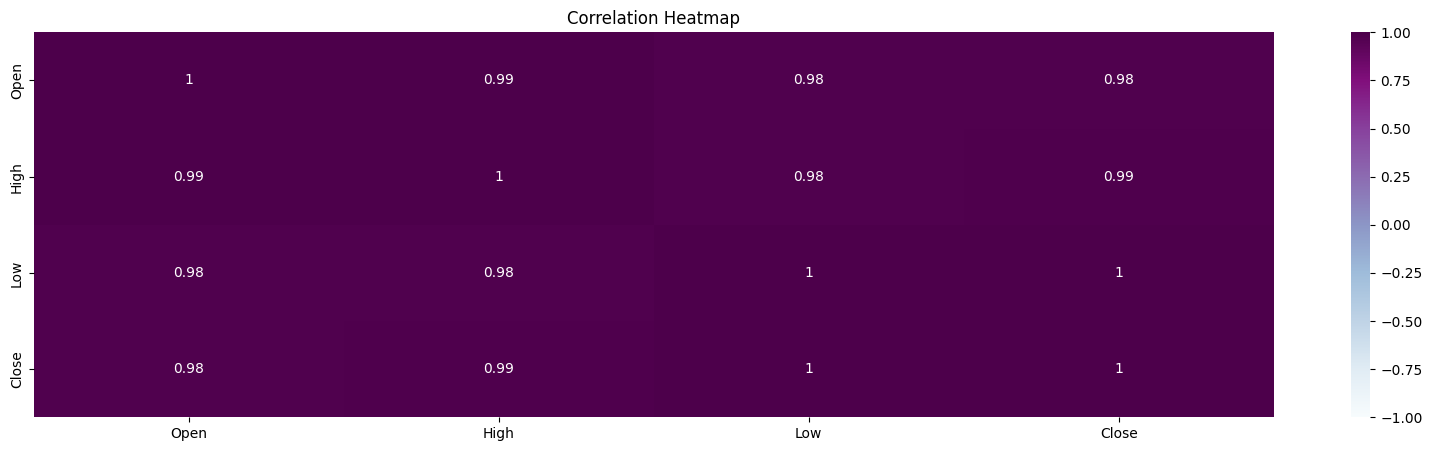

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True )

##### 1. Why did you pick the specific chart?

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart. that shows us how closely related different variables are

##### 2. What is/are the insight(s) found from the chart?

All variables are highly correlated with each other i.e. High Positive Correlation.

#### Chart - 9 - PAIR PLOT

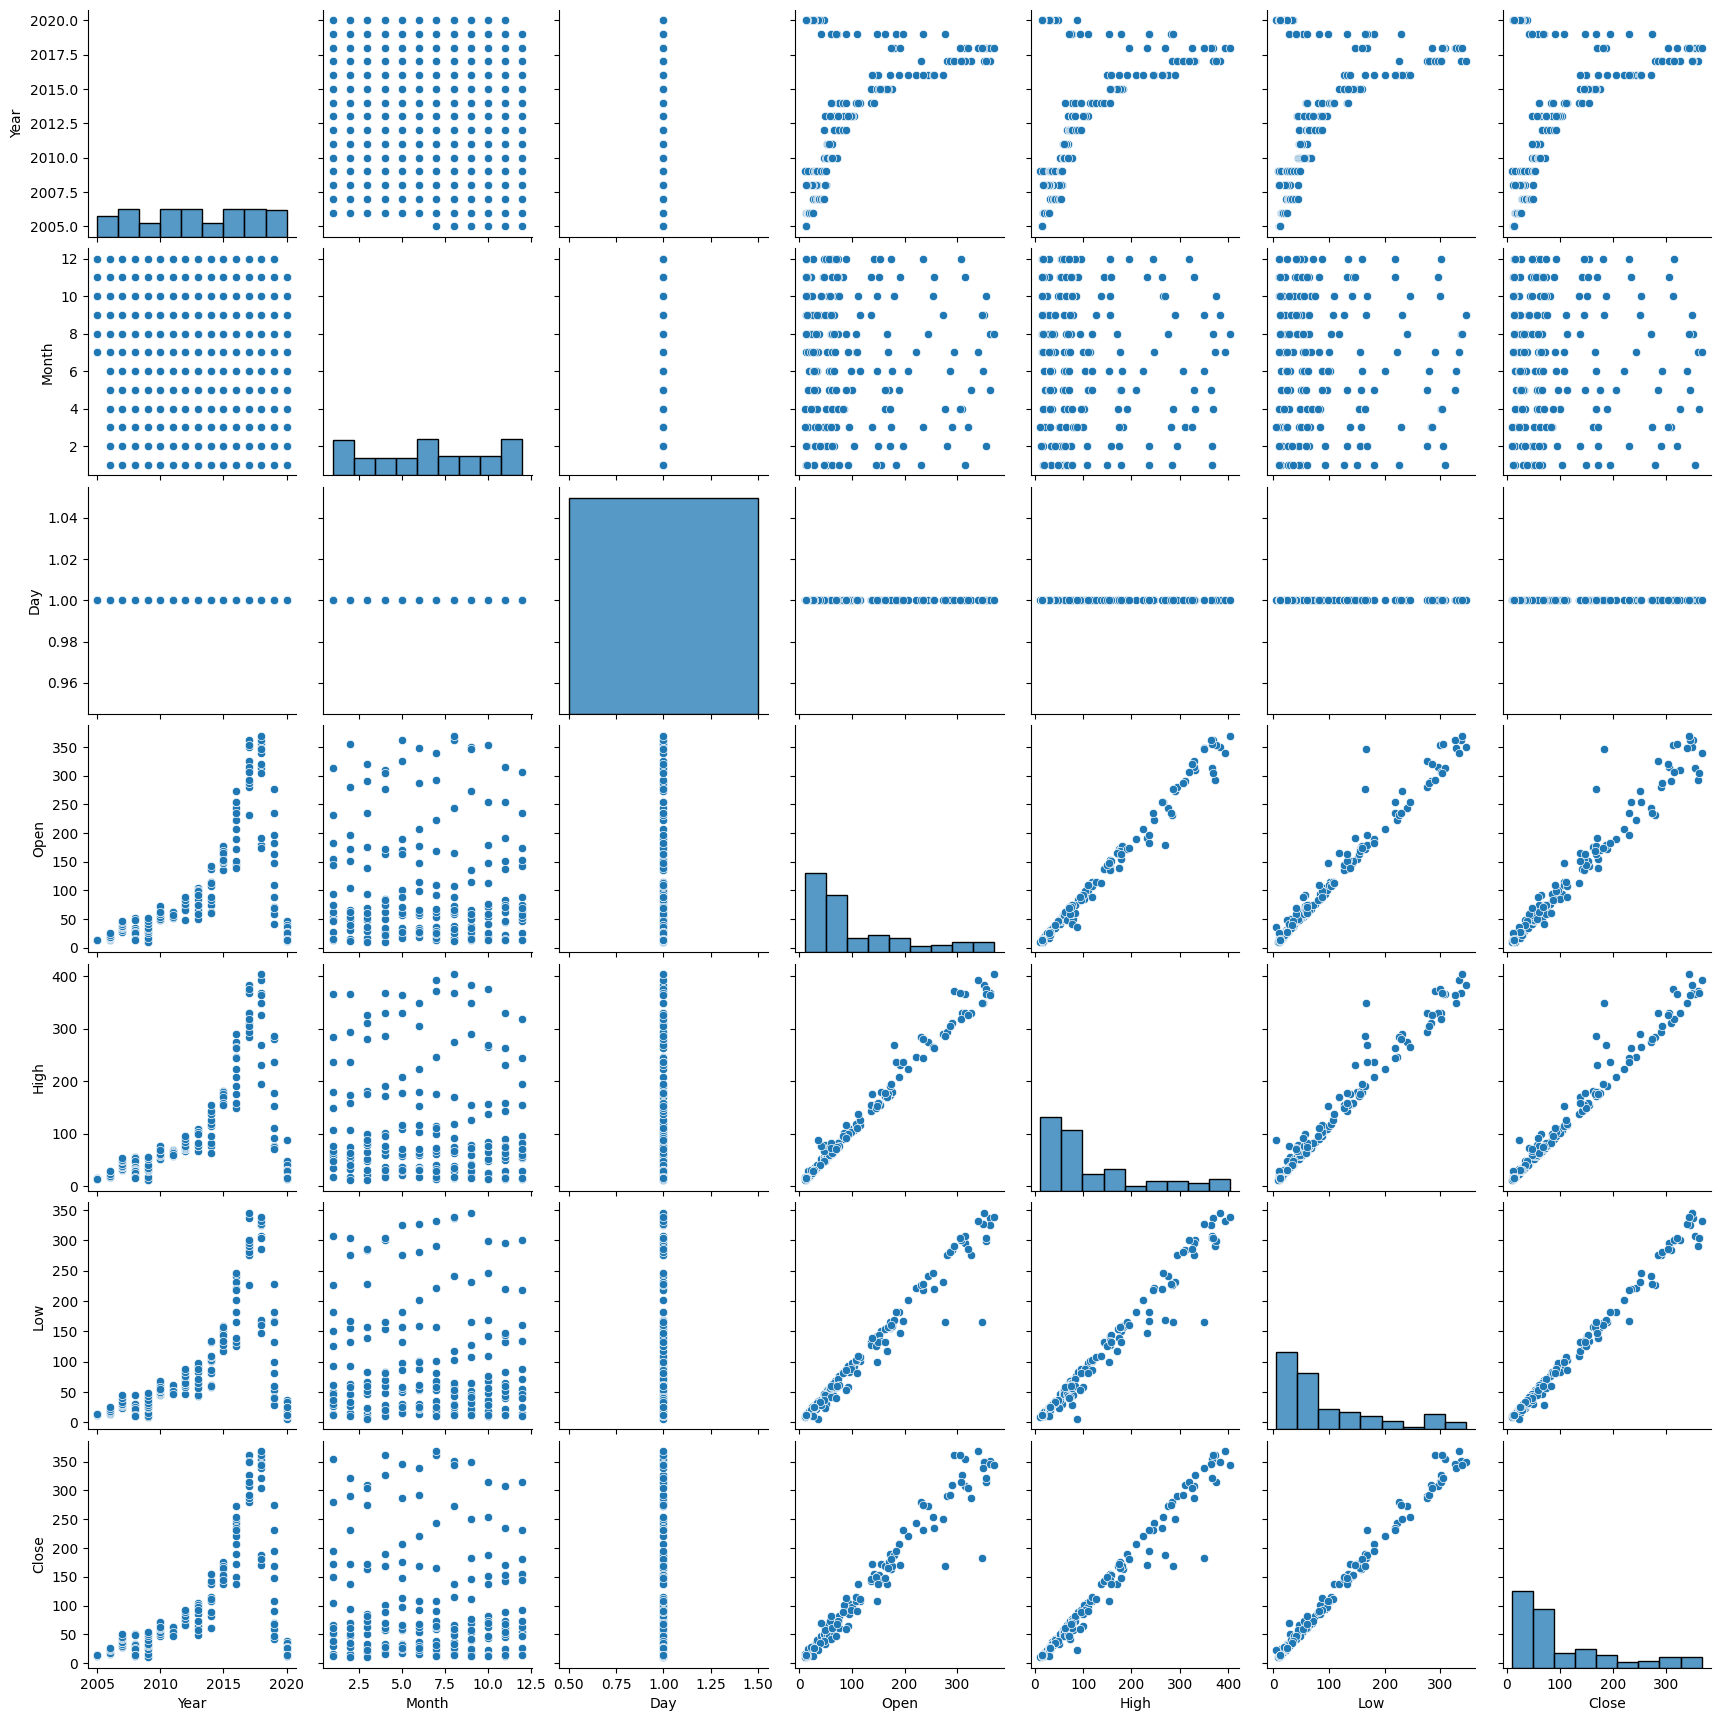

In [ ]:
# Chart - 9 visualization code

sns.pairplot(Stock_Data)

##### 1. Why did you pick the specific chart?

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. Plot pairwise relationships in a data-set. Pairplot is a module of seaborn library which provides a high-level interface for drawing attractive and informative statistical graphics.

##### 2. What is/are the insight(s) found from the chart?

From the above pair plot, I got know the relationship with each and ever variable.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### ***As per the charts on closing price discussed above, I will perform Hypothesis Testing on Closing price of YES Bank.***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

As discused above,

NULL HYPOTHESIS (Ho) = 105.20

ALTERNATE HYPOTHESIS (H1) != 105.20

TYPE OF TEST = 2 TAILED TEST

#### 2. Perform an appropriate statistical test.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)


# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
    
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=Stock_Data['Close']


# Getting the required parameter values for hypothesis testing
hypothesis_number = 30
sample_mean = hypo_1.mean()
size = len(hypo_1)
std=(variance(hypo_1))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)


# Getting P - Value
p = p_value(z=z,tailed='d',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col='Close')


# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test(Two Tailed Test) as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

##### Why did you choose the specific statistical test?

A z-test is used in hypothesis testing to evaluate whether a finding or association is statistically significant or not. In particular, it tests whether two means are the same (the null hypothesis). A z-test can only be used if the population standard deviation is known and the sample size is 30 data points or larger.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation (Already discussed above in EDA)

Stock_Data.isnull().sum()


Date     0
Year     0
Month    0
Day      0
Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

### There are no such Missing Values or Null Values in dataset.



### 2. Handling Outliers

In [ ]:
Stock_Data.shape

(185, 8)

In [ ]:
''' Detection '''
# IQR METHOD
# Calculate the upper and lower limits
Q1 = Stock_Data['Close'].quantile(0.25)
Q3 = Stock_Data['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_fence= Q1 - 1.5*IQR
upper_fence= Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(Stock_Data['Close']>=upper_fence)[0]
lower_array = np.where(Stock_Data['Close']<=lower_fence)[0]
 
# Removing the outliers
Stock_Data.drop(index=upper_array, inplace=True)
Stock_Data.drop(index=lower_array, inplace=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", Stock_Data.shape)

New Shape:  (176, 8)


##### What all outlier treatment techniques have you used and why did you use those techniques?

To identify outliers, refer Chart 1 (BOX PLOT). Already mentioned in EDA. 

Here I used Interquartile Range (IQR) Method because the data is skewed. Refere Chart 2 in EDA for better understanding and data visualization.

Though the dataset is small so, double checked manually in "data_YesBank_StockPrices.csv" and the outputr is correct.

### 3. Categorical Encoding

## ***No need for Categorical Encoding in the given dataset which I am working on. So, skipping this part.***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

## ***There are no text columns in the given dataset which I am working on. So, skipping this part.***

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

#### 9. Part of speech tagging

#### 10. Text Vectorization

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

Stock_Data = Stock_Data.drop(['Day', 'Month', 'Year'], axis=1)
Stock_Data['OHL'] = Stock_Data[['Open', 'High', 'Low']].mean(axis=1).round(2)
Stock_Data.head()

,Date,Open,High,Low,Close,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


In [ ]:
Stock_df = Stock_Data.drop(['Open', 'High', 'Low'], axis=1)
Stock_df.corr()

,Close,OHL
Close,1.000000,0.987674
OHL,0.987674,1.000000


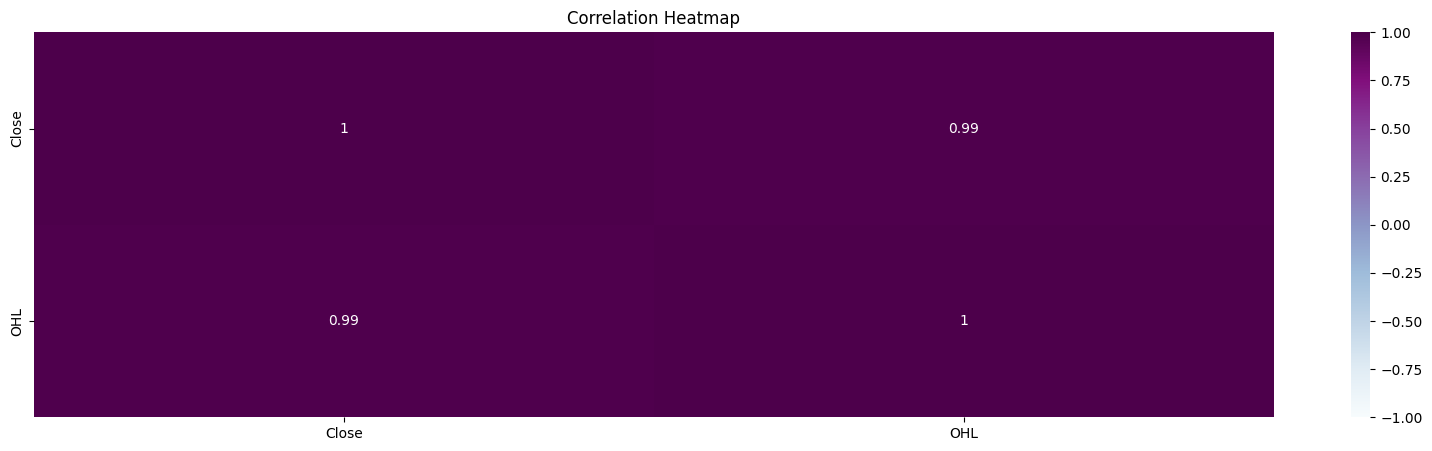

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
corr = sns.heatmap(Stock_df.corr(), vmin=-1, vmax=1, cmap='BuPu', annot=True) 

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
# choose appropriate Dependent and Independent variables
y = Stock_Data.dropna().Close #Dependent Variable
X = Stock_Data.dropna().drop(['Date','Close','Open','High','Low'], axis=1)  #Independent Variable

In [ ]:
print(y)

0      12.46
1      13.42
2      13.30
3      12.99
4      13.41
       ...  
180    11.95
181    14.37
182    13.15
183    12.42
184    14.67
Name: Close, Length: 176, dtype: float64


In [ ]:
print(X)

       OHL
0    12.75
1    13.34
2    13.54
3    13.36
4    13.37
..     ...
180  21.67
181  13.67
182  14.13
183  13.14
184  13.17

[176 rows x 1 columns]


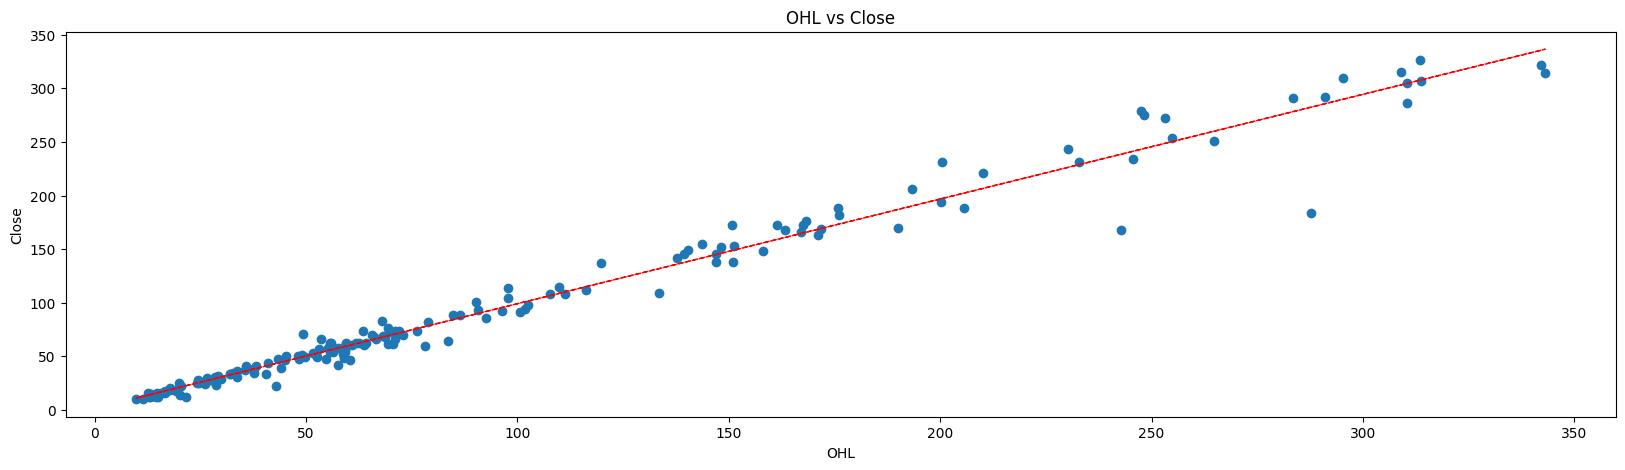

In [ ]:
# scatter plot to see the relationship between dependent & independent variables

fig = plt.figure(figsize=(20,5))
ax = fig.gca()
plt.scatter(Stock_Data['OHL'], Stock_Data['Close'])
plt.xlabel('OHL')
plt.ylabel('Close')
ax.set_title('OHL vs Close')
z = np.polyfit(Stock_Data['OHL'], Stock_Data['Close'], 1)
y_hat = np.poly1d(z)(Stock_Data['OHL'])
plt.plot(Stock_Data['OHL'], y_hat, "r--", lw=1)
plt.show()
     

##### What all feature selection methods have you used  and why?

I used Dropping Constant Feature, Dropping columns having multicolinearity. We already saw correlation heatmap, where the variables are highly correlated with each other. Hence choosen 'Close' which is our dependent variable and calculate mean of 'Open', 'High', 'Low' and created a new column named 'OHL'. 'OHL' is our independent variable.

##### Which all features you found important and why?

'Close' - Dependent Variable

'Open', 'High', 'Low' ---> Calculated mean ---> formed new column 'OHL' ---> 'OHL' is Independent Variable.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

After checking of multicollinearity and Feature Selection, we have to split the dataset and then convert that data into gaussian distribution. Data transformation is done in Data Scaling.

### 6. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction not needed.

### 7. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##### What data splitting ratio have you used and why? 

80:20

### 8. Data Scaling

In [ ]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

Dataset is in log normal distribution so we have to convert it into gaussian distribution.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Dataset is balanced. Dataset is prone to imbalanced in Classification machine learning problems.

## ***7. ML Model Implementation***

### ML Model - 1

## ***Linear Regression***

Linear Regression is the supervised Machine Learning model in which the model finds the best fit linear line between the independent and dependent variable i.e it finds the linear relationship between the dependent and independent variable.

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train, y_train)

# Predict on the model
lr_y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_train, y_train)

0.9673439397277707

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_adjusted_r2 = round(1-(1-r2_score((y_test), (lr_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(lr_adjusted_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

mean absolute error: 4.54

mean squared error: 61.26

root mean squared error: 7.83

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





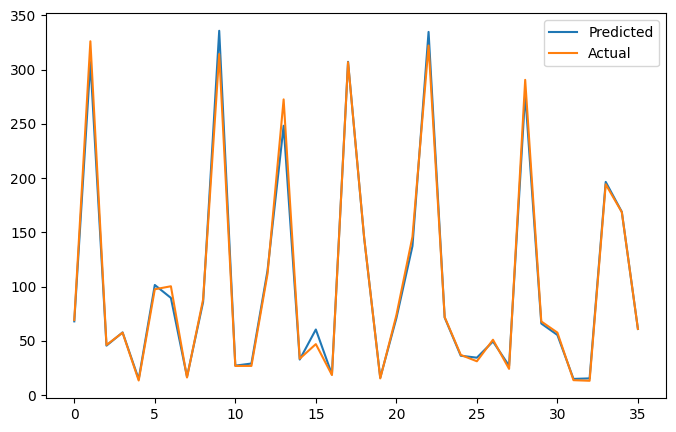

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lr_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

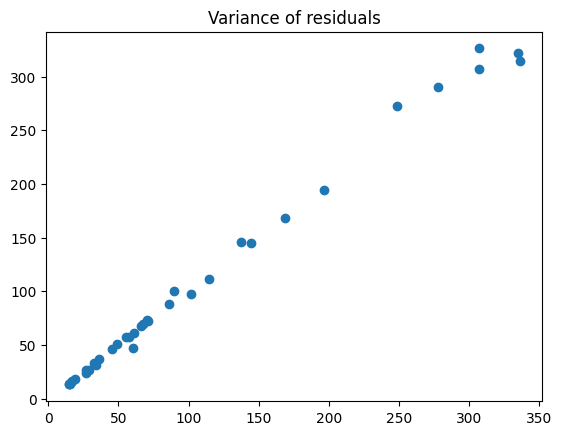

In [ ]:
# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Linear Regression does not have hyperparameters that can be tuned.

### ML Model - 2

## ***Ridge Regression***

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 1 Implementation
ridge = Ridge(alpha=0.1)

# Fit the Algorithm
ridge.fit(X_train, y_train)

# Predict on the model
r_y_pred = ridge.predict(X_test)

In [ ]:
ridge.score(X_train, y_train)

0.9673439397277575

In [ ]:
# Visualizing evaluation Metric Score chart

# evaluate predictions
r_mae = round(mean_absolute_error(y_test, r_y_pred),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(y_test, r_y_pred),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(y_test, r_y_pred),2)
print('r2_score: {}\n'.format(r_r2))
r_adjusted_r2 = round(1-(1-r2_score((y_test), (r_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(r_adjusted_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

mean absolute error: 4.54

mean squared error: 61.26

root mean squared error: 7.83

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





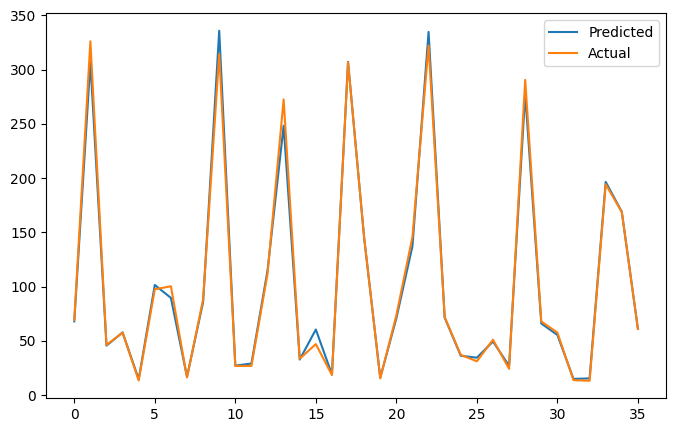

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(r_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

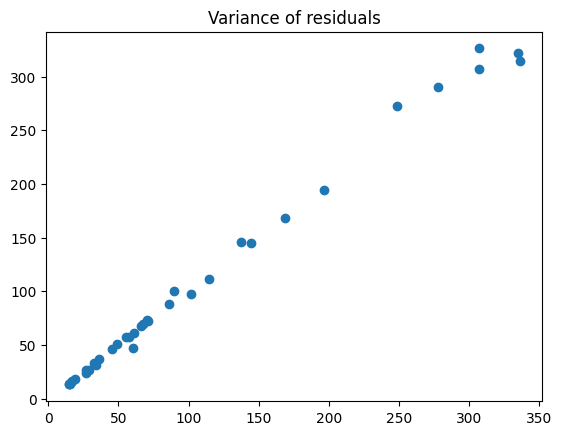

In [ ]:
# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -202.59998009440616


In [ ]:
# evaluate predictions
r_mae = round(mean_absolute_error(y_test, y_pred_ridge),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(y_test, y_pred_ridge),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(y_test, y_pred_ridge),2)
print('r2_score: {}\n'.format(r_r2))
r_adjusted_r2 = round(1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(r_adjusted_r2))
r_mape = round(mean_absolute_percentage_error(y_pred_ridge, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

mean absolute error: 4.54

mean squared error: 61.28

root mean squared error: 7.83

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





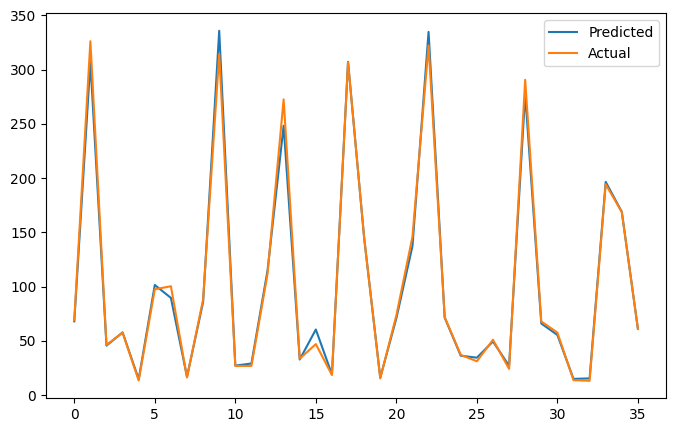

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

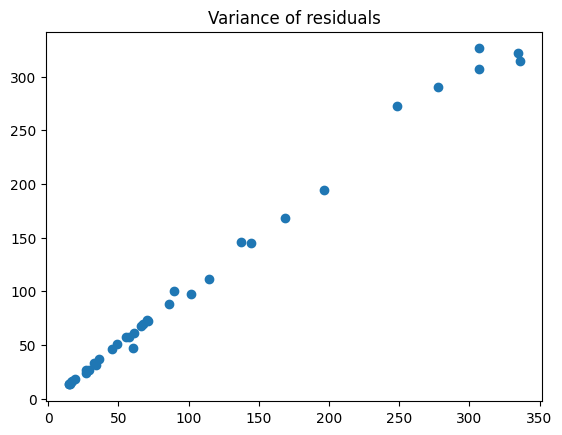

In [ ]:
# Check for homoscadacity
plt.scatter(y_pred_ridge, y_test)
plt.title('Variance of residuals')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique. The model as well as the parameters must be entered. After extracting the best parameter values, predictions are made.

### ML Model - 3

## ***Lasso Regression***

Lasso regression algorithm is defined as a regularization algorithm that assists in the elimination of irrelevant parameters, thus helping in the concentration of selection and regularizes the models.

In [ ]:
# ML Model - 3 Implementation
lasso = Lasso(alpha=0.1 , max_iter= 3000)
# Fit the Algorithm
lasso.fit(X_train, y_train)
# Predict on the model
l_y_pred = lasso.predict(X_test)

In [ ]:
lasso.score(X_train, y_train)

0.9673439394540895

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_adjusted_r2 = round(1-(1-r2_score((y_test), (l_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(l_adjusted_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

mean absolute error: 4.54

mean squared error: 61.26

root mean squared error: 7.83

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





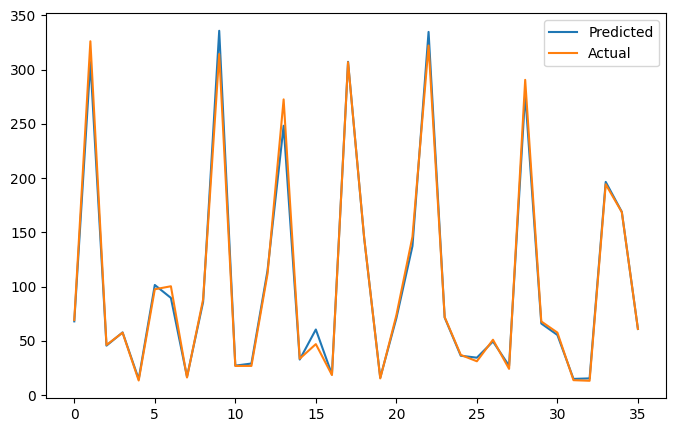

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(l_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

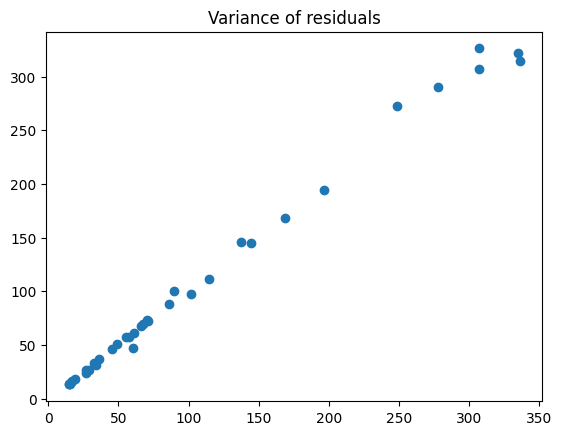

In [ ]:
# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -202.5794979881225


In [ ]:
# evaluate predictions
l_mae = round(mean_absolute_error(y_test, y_pred_lasso),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, y_pred_lasso),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, y_pred_lasso),2)
print('r2_score: {}\n'.format(l_r2))
l_adjusted_r2 = round(1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(l_adjusted_r2))
l_mape = round(mean_absolute_percentage_error(y_pred_lasso, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

mean absolute error: 4.55

mean squared error: 61.58

root mean squared error: 7.85

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





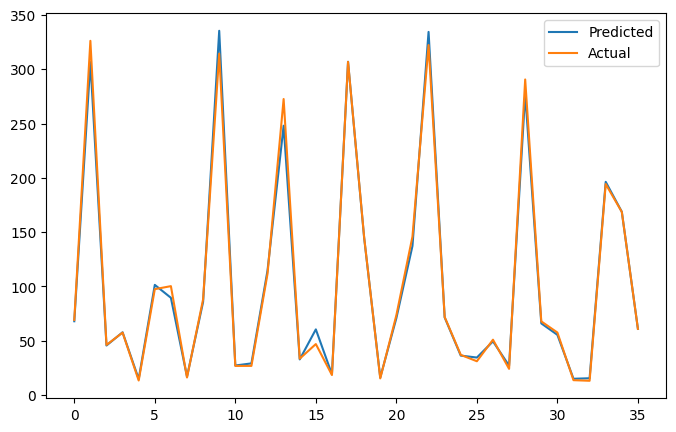

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

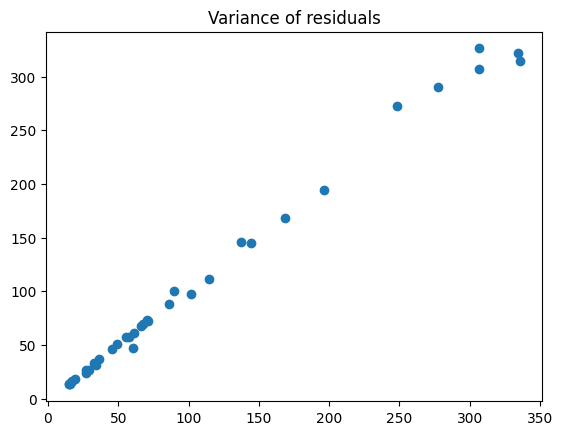

In [ ]:
# Check for homoscadacity
plt.scatter(y_pred_lasso, y_test)
plt.title('Variance of residuals')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV Technique is used in hyper parameter optimization.

### ML Model - 4

## ***ElasticNet Regression***

In [ ]:
# ML Model - 3 Implementation
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
# Fit the Algorithm
elasticnet.fit(X_train,y_train)
# Predict on the model
en_y_pred = elasticnet.predict(X_test)

In [ ]:
elasticnet.score(X_train, y_train)

0.9673439394611445

In [ ]:
# evaluate predictions
en_mae = round(mean_absolute_error(y_test, en_y_pred),2)
print('mean absolute error: {}\n'.format(en_mae))
en_mse = round(mean_squared_error(y_test, en_y_pred),2)
print('mean squared error: {}\n'.format(en_mse))
en_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(en_rmse))
en_r2 = round(r2_score(y_test, en_y_pred),2)
print('r2_score: {}\n'.format(en_r2))
en_adjusted_r2 = round(1-(1-r2_score((y_test), (en_y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(en_adjusted_r2))
en_mape = round(mean_absolute_percentage_error(en_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(en_mape))

mean absolute error: 4.54

mean squared error: 61.26

root mean squared error: 7.85

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





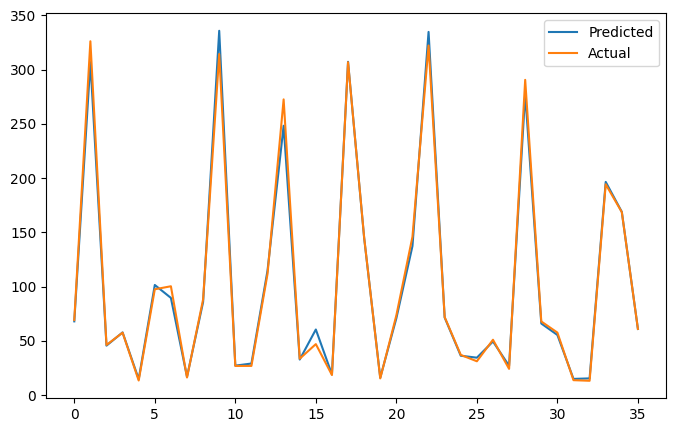

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(en_y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

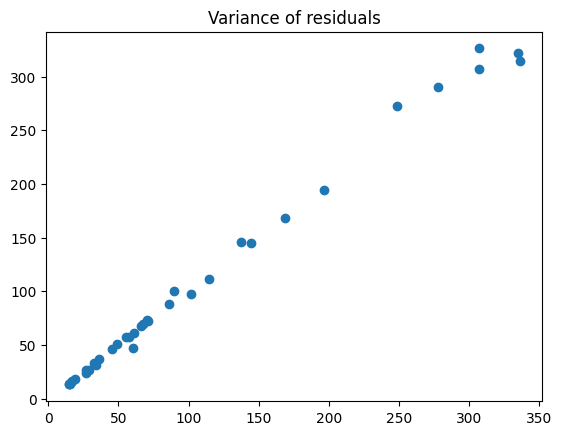

In [ ]:
# Check for homoscadacity
plt.scatter(en_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)
# Predict the Model
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10, 'l1_ratio': 0.3}

Using  {'alpha': 10, 'l1_ratio': 0.3}  the negative mean squared error is:  -205.4883627872273


In [ ]:
# evaluate predictions
en_mae = round(mean_absolute_error(y_test, y_pred_elastic),2)
print('mean absolute error: {}\n'.format(en_mae))
en_mse = round(mean_squared_error(y_test, y_pred_elastic),2)
print('mean squared error: {}\n'.format(en_mse))
en_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(en_rmse))
en_r2 = round(r2_score(y_test, y_pred_elastic),2)
print('r2_score: {}\n'.format(en_r2))
en_adjusted_r2 = round(1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),2)
print('adjusted_r2_score: {}\n'.format(en_adjusted_r2))
en_mape = round(mean_absolute_percentage_error(y_pred_elastic, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(en_mape))

mean absolute error: 4.55

mean squared error: 61.57

root mean squared error: 7.85

r2_score: 0.99

adjusted_r2_score: 0.99

mean absolute percentage error: 0.05





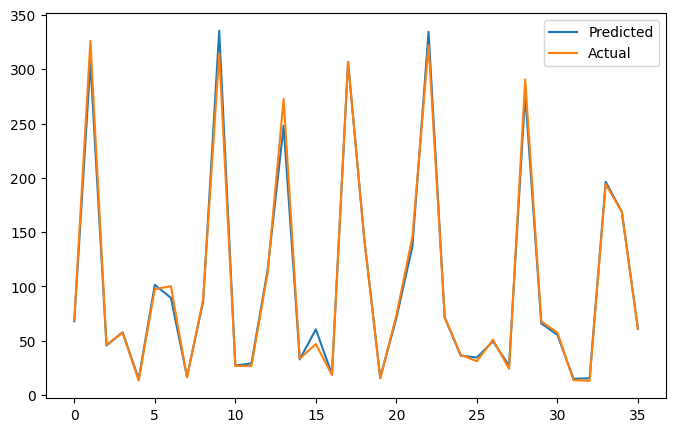

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_elastic)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

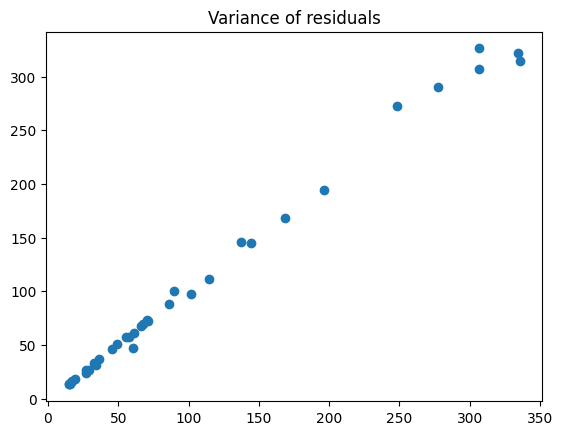

In [ ]:
# Check for homoscadacity
plt.scatter(y_pred_elastic, y_test)
plt.title('Variance of residuals')
plt.show()

## ***Dataframe with evaluation metrics***

In [ ]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[lr_mae,r_mae,l_mae,en_mae], 'mse':[lr_mse,r_mse,l_mse,en_mse],'rmse':[lr_rmse,r_rmse,l_rmse,en_rmse],'r2_score':[lr_r2,r_r2,l_r2,en_r2],'adjusted_r2_score':[lr_adjusted_r2,r_adjusted_r2,l_adjusted_r2,en_adjusted_r2],'mape':[lr_mape,r_mape,l_mape,en_mape]})
model_report 

,model,mae,mse,rmse,r2_score,adjusted_r2_score,mape
0,linear regression,4.54,61.26,7.83,0.99,0.99,0.05
1,ridge regression,4.54,61.28,7.83,0.99,0.99,0.05
2,lasso regression,4.55,61.58,7.85,0.99,0.99,0.05
3,elastic net regression,4.55,61.57,7.85,0.99,0.99,0.05


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Mean absolute error**, also known as L1 loss is one of the simplest loss functions and an easy-to-understand evaluation metric. It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.

**MSE** is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

**Root mean square error** or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

The **R2 score** is a very important metric that is used to evaluate the performance of a regression-based machine learning model. It is pronounced as R squared and is also known as the coefficient of determination. It works by measuring the amount of variance in the predictions explained by the dataset.

**Adjusted R2** is a corrected goodness-of-fit (model accuracy) measure for linear models. It identifies the percentage of variance in the target field that is explained by the input or inputs. R2 tends to optimistically estimate the fit of the linear regression.

**Mean Absolute Percentage Error (MAPE)** is a statistical measure to define the accuracy of a machine learning algorithm on a particular dataset.
MAPE can be considered as a loss function to define the error termed by the model evaluation. Using MAPE, we can estimate the accuracy in terms of the differences in the actual v/s estimated values.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As per my final prediction, Linear Regression machine learning is better because its evaluation metrics is better than other machine learning supervised regression model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

***Linear regression*** is a quiet and simple statistical regression method used for predictive analysis and shows the relationship between the continuous variables. Linear regression shows the linear relationship between the independent variable (X-axis) and the dependent variable (Y-axis), consequently called linear regression. If there is a single input variable (x), such linear regression is called simple linear regression. And if there is more than one input variable, such linear regression is called multiple linear regression. The linear regression model gives a sloped straight line describing the relationship within the variables.

***Ridge regression*** is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. It has been used in many fields including econometrics, chemistry, and engineering. Also known as Tikhonov regularization, named for Andrey Tikhonov, it is a method of regularization of ill-posed problems. It is particularly useful to mitigate the problem of multicollinearity in linear regression, which commonly occurs in models with large numbers of parameters.In general, the method provides improved efficiency in parameter estimation problems in exchange for a tolerable amount of bias (see bias–variance tradeoff). 

***lasso (least absolute shrinkage and selection operator; also Lasso or LASSO)*** is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model. It was originally introduced in geophysics and later by Robert Tibshirani, who coined the term. 

***Elastic net Regression***, in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. 



## ***Time Series Analysis***

***Moving Average*** ---> A moving average is a calculation to analyze data points by creating a series of averages of different selections of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter. Variations include: simple, cumulative, or weighted forms

In [ ]:
# function for calculating moving average

def moving_average(series, n):
  
  """
  Calculate average of last n observation
  """
  
  return round(np.average(series[-n:]),2)

moving_average(df['Close'],12) # prediction for next month closing price using observed previous 12 months data

24.18

Unfortunately we can make only one prediction, to make further predictions we need to have the actual observed values. However moving average can be used to identify the trends by smoothing the time series using a pandas implementation DataFrame.rolling(window).mean().

In [ ]:
# # set back up the date column
# df = df.reset_index()
# df['Date'] = df_date

# function for plotting moving average
def ma(series, window, plot_intervals=False):

  """
  series - dataframe column with timeseries
  window - rolling window size
  """

  rolling_mean = series.rolling(window=window).mean()

  plt.figure(figsize=(20,5))
  plt.title('Moving average \n window size = {}'.format(window))
  plt.plot(df['Date'], rolling_mean, "g", label = "Rolling mean trend")
  
  # plotting confidence intervals
  if plot_intervals:
    mae = mean_absolute_error(series[window:], rolling_mean[window:])
    deviation = np.std(series[window] - rolling_mean[window:])
    lower_bound = rolling_mean - (mae + deviation)
    upper_bound = rolling_mean + (mae + deviation)
    plt.plot(df['Date'], lower_bound, "r--", label = "Upper/Lower bounds")
    plt.plot(df['Date'], upper_bound, "r--")
  
  plt.plot(df['Date'], series, label = "Actual values")
  plt.legend(loc="upper left")
  plt.grid(True)
  plt.show()

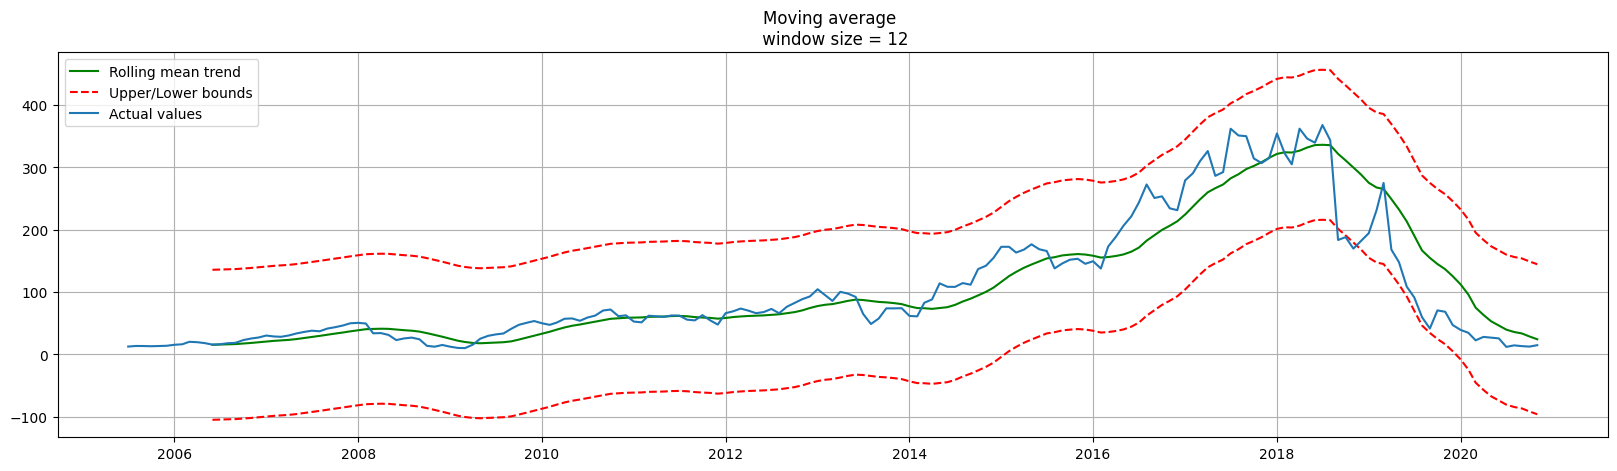

In [ ]:
# plotting 12 months moving average 
ma(df['Close'],12, plot_intervals=True) # smoothing by previous 12 months

***Exponential Weighted Moving Average*** ---> An exponential moving average (EMA), also known as an exponentially weighted moving average (EWMA), is a first-order infinite impulse response filter that applies weighting factors which decrease exponentially. The weighting for each older datum decreases exponentially, never reaching zero.

In [ ]:
# function that returns weighted moving average
def wma(series, weights):
  """
  calculate weighted moving average of the series
  """
  result = 0.0
  for w in range(len(weights)):
    result += series.iloc[-w-1] * weights[w]
    return float(result)

wma(df['Close'], weights = [0.5, 0.3, 0.2])

7.335

In [ ]:
# function that does exponential smoothing
def exponential_smoothing(series, alpha):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter
  """
  result = [series[0]]
  for n in range(len(series)):
    result.append(alpha * series[n] + (1 - alpha) * result[n-1])
  return result

In [ ]:
# function to plot exponentail moving averages
def ema(series, alphas):
  """
  series - dataframe colummn with time series
  alpha - smoothing parameters
  """
  with plt.style.context('seaborn-white'):
    plt.figure(figsize=(20,5))
    for alpha in alphas:
      plt.plot(exponential_smoothing(series, alpha), label = "Alpha{}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.legend(loc="best")
    plt.grid(True)

In [ ]:
#make prediction
round(exponential_smoothing(df['Close'], alpha=0.2)[-1],2)

53.87

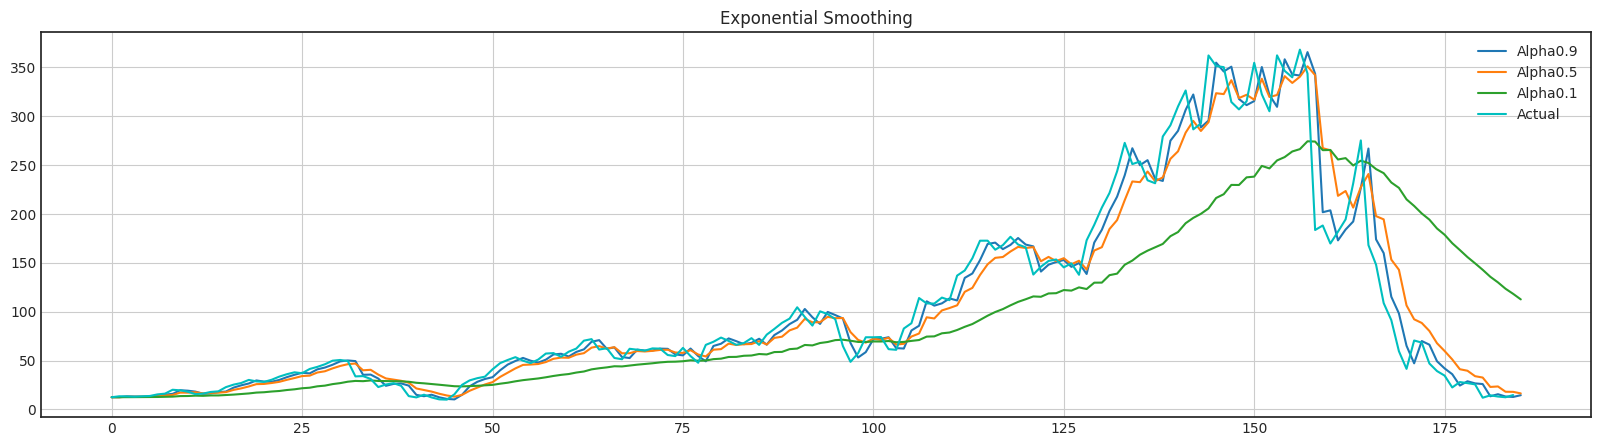

In [ ]:
# plot ema
ema(df['Close'], [0.9, 0.5, 0.1])

Holt's Linear Trend Method ---> Holt's Linear Trend Method technique, also known as double exponential smoothing, is a widely known smoothing model for forecasting data that has a trend. 

In [ ]:
# function that does double exponential smoothing
def double_exponential_smoothing(series, horizon, alpha, beta):
  """
  series - dataframe column with timeseries
  alpha - smoothing parameter for level
  beta - smoothing parameter for trend
  """
  # first value is same as series
  result = [series[0]]
  for n in range(1, len(series)+horizon):
      if n == 1:
          level, trend = series[0], series[1] - series[0]
      if n >= len(series): 
          value = result[-1]
      else:
          value = series[n]
      last_level, level = level, alpha*value + (1-alpha)*(level+trend)
      trend = beta*(level-last_level) + (1-beta)*trend
      result.append((level+trend).round(2))
  print(result[-horizon:])
  return result

In [ ]:
# function to plot dema
def dema(series, horizon, alpha, beta):
    """
        Plots double exponential smoothing with different alphas and betas
        series - dataframe column with timeseries
        alphas - smoothing parameters for level
        betas - smoothing parameters for trend
    """
    
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(20, 5))
        plt.plot(double_exponential_smoothing(series, horizon, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
        plt.plot(series.values, label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        
        plt.title("Double Exponential Smoothing")
        plt.grid(True)

Prediction by various combination of alphas and betas.

[28.47, 29.2, 29.93, 30.66, 31.39, 32.12]
[23.76, 22.37, 20.98, 19.59, 18.2, 16.81]
[14.17, 8.22, 2.27, -3.68, -9.63, -15.58]
[18.8, 18.44, 18.08, 17.72, 17.36, 17.0]
[34.31, 41.52, 48.73, 55.95, 63.16, 70.37]


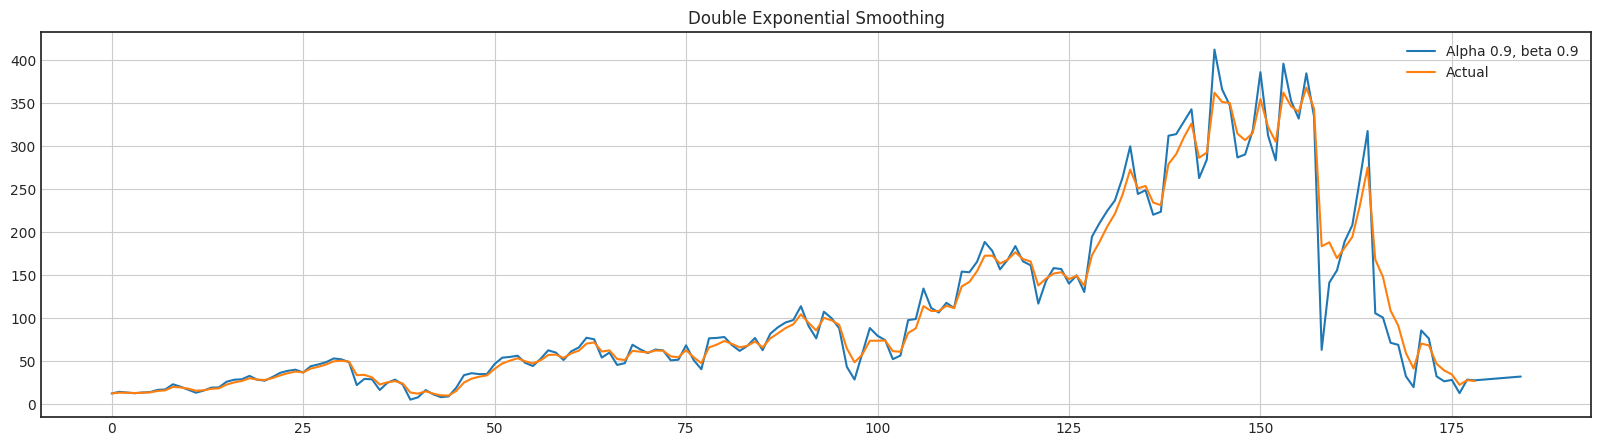

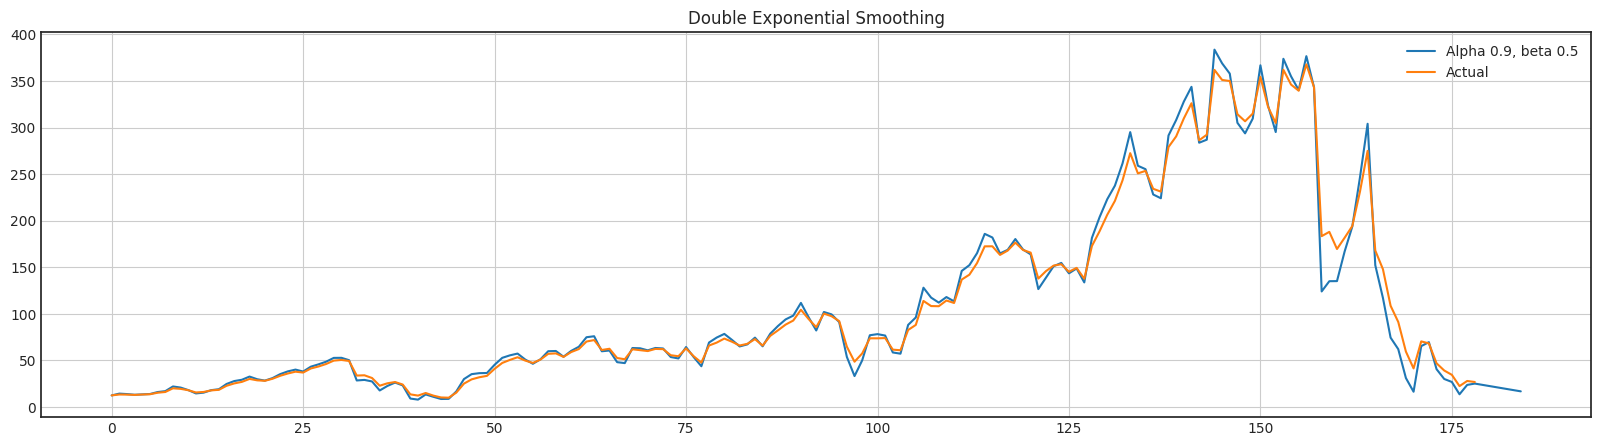

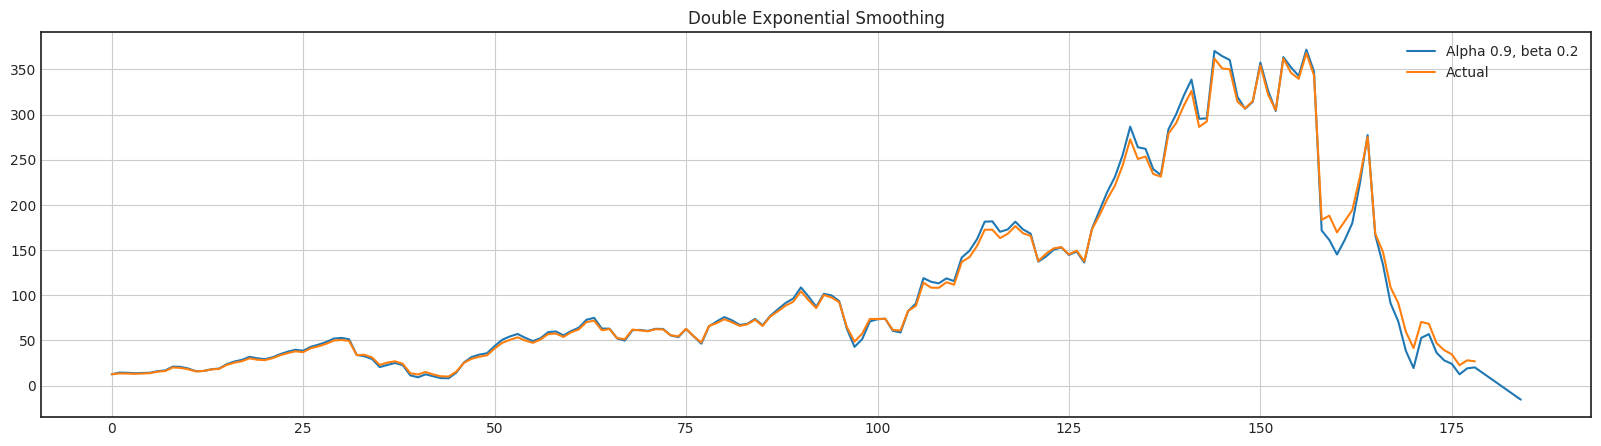

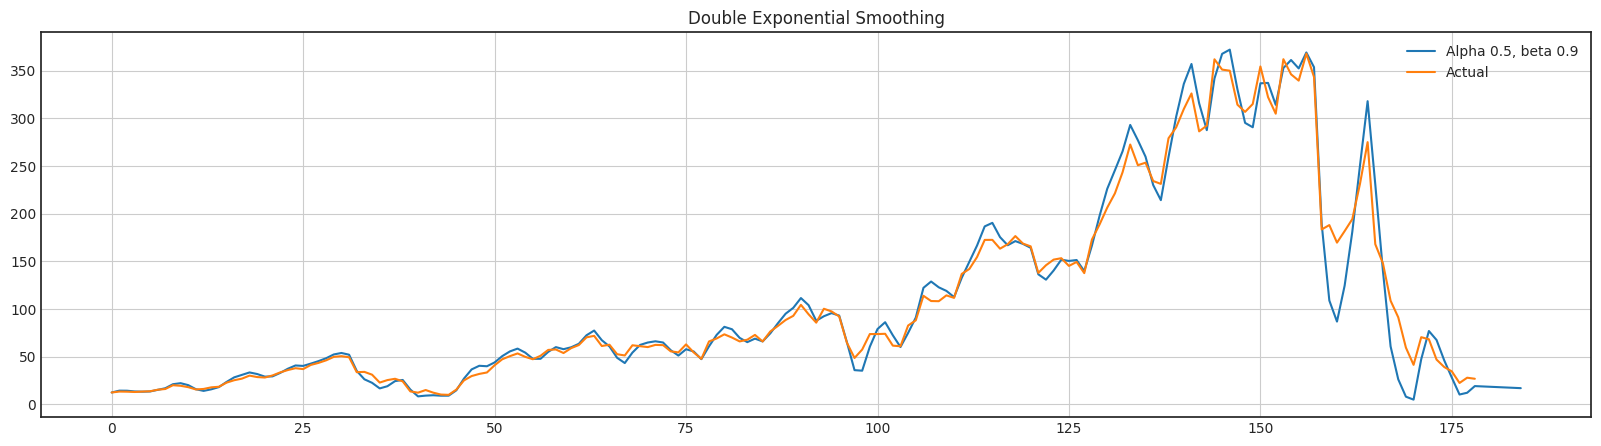

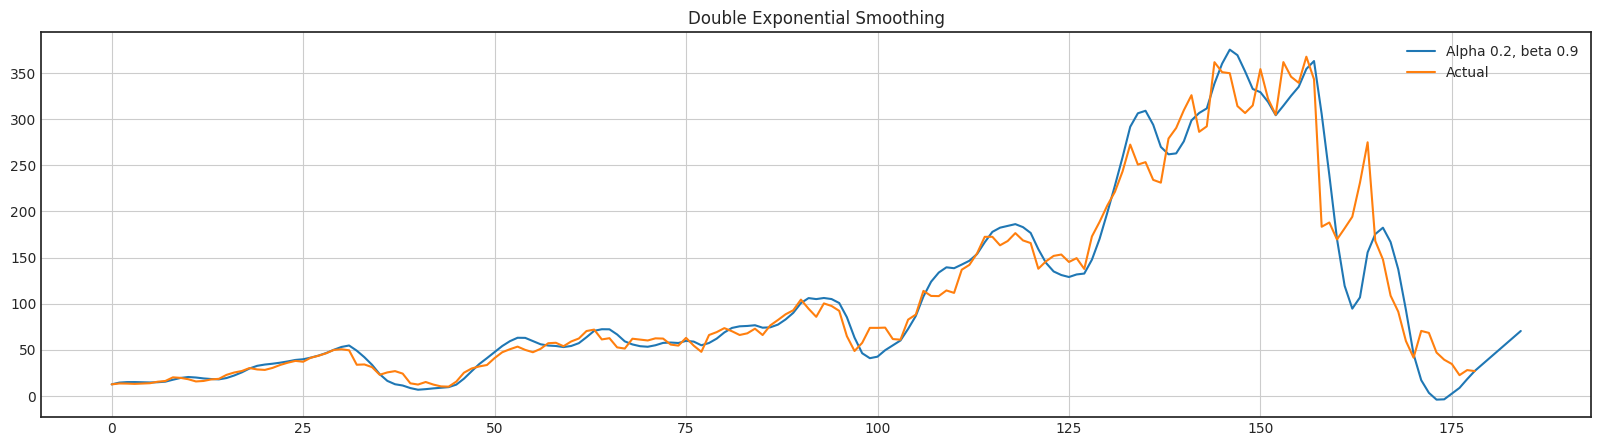

In [ ]:
# Try multiple values of alpha and beta
combinations = [(0.9,0.9), (0.9, 0.5), (0.9, 0.2), (0.5, 0.9), (0.2, 0.9)]
for alpha, beta in combinations:
  dema(df['Close'][0:179], 6, alpha, beta)

The ***Dickey–Fuller test*** tests the null hypothesis that a unit root is present in an autoregressive (AR) time series model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. The test is named after the statisticians David Dickey and Wayne Fuller, who developed it in 1979.

In [ ]:
# Implement Dickey-Fuller test
X = Stock_Data['Close'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.786956
p-value: 0.386957
Critical Values:
	1%: -3.470
	5%: -2.879
	10%: -2.576


ADF statistic is greater than all our critical values, thus we have failed to reject the null hypothesis. It's confirmed that our time series model is not stationary. We'll make it stationary to build ARIMA model and then make future predictions.

In [ ]:
# function to take lags
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey-Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

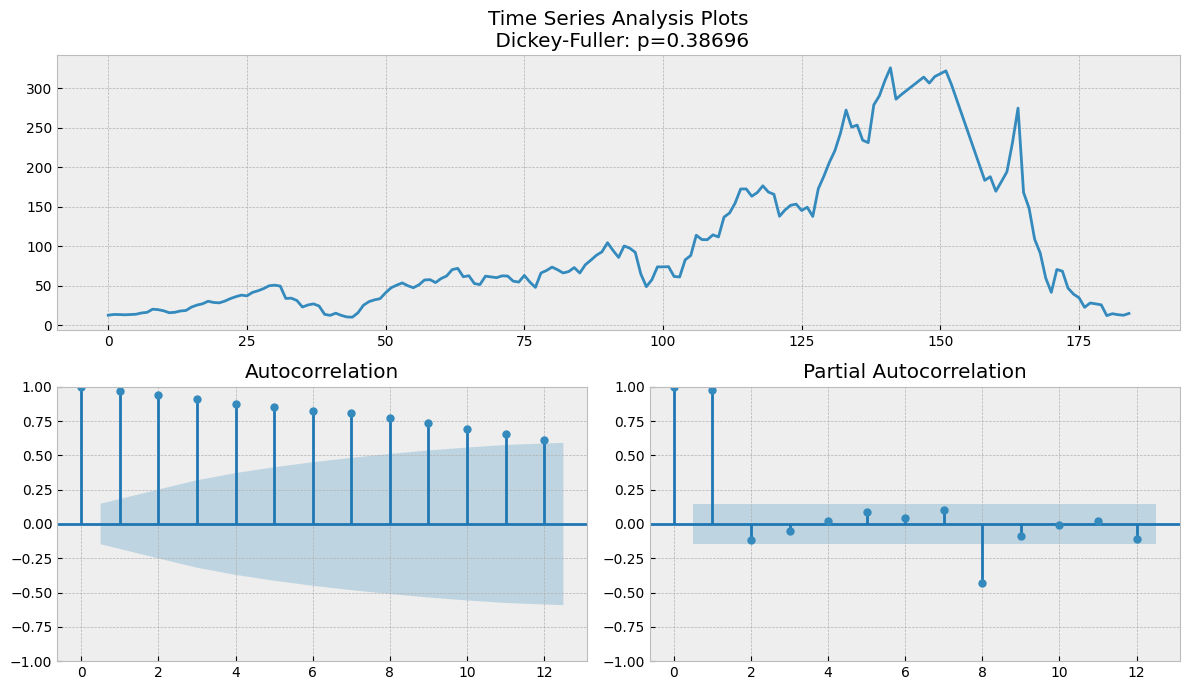

In [ ]:
# plot to check stationarity
tsplot(Stock_Data['Close'], lags=12)

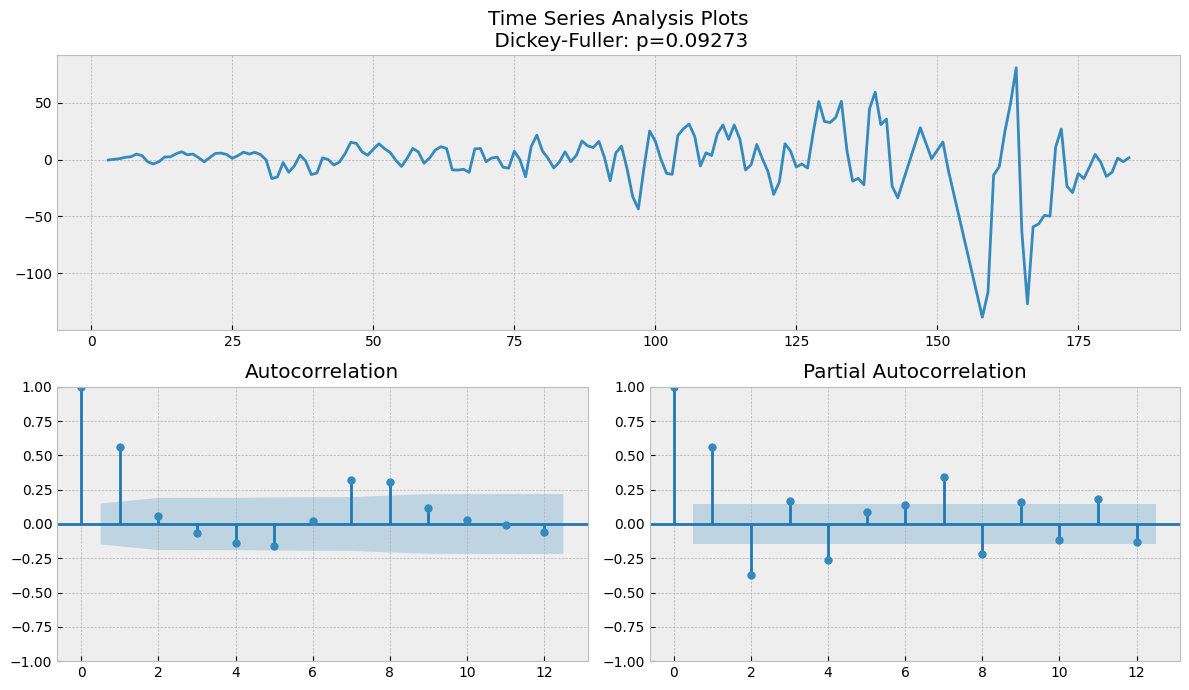

In [ ]:
# differnce transform
diff = Stock_Data['Close'] - Stock_Data['Close'].shift(2)
tsplot(diff[3:], lags=12)

An ***autoregressive integrated moving average, or ARIMA***, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. A statistical model is autoregressive if it predicts future values based on past values.

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  172
Model:                 ARIMA(2, 1, 7)   Log Likelihood                -730.947
Date:                Mon, 29 May 2023   AIC                           1481.895
Time:                        16:57:29   BIC                           1513.311
Sample:                             0   HQIC                          1494.642
                                - 172                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0173      0.040     -0.429      0.668      -0.096       0.062
ar.L2         -0.9303      0.050    -18.779      0.000      -1.027      -0.833
ma.L1          0.0804     33.664      0.002      0.9

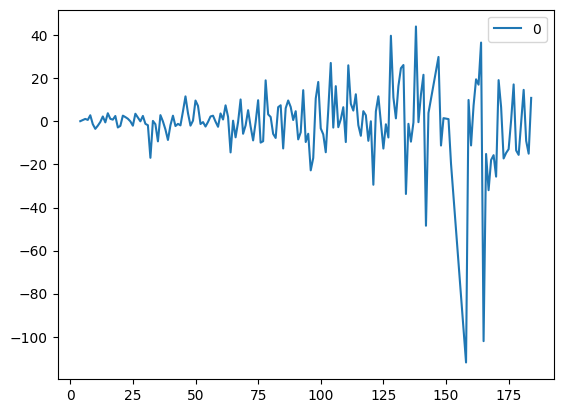

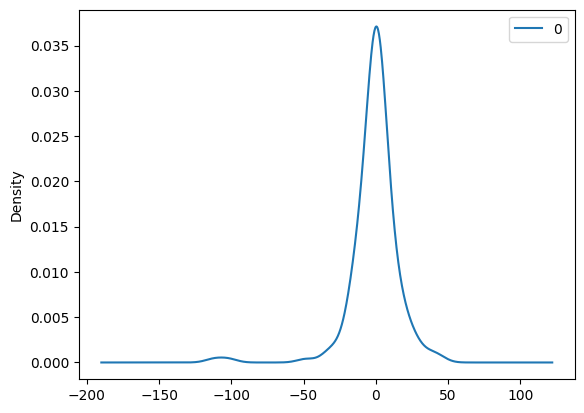

In [ ]:
# fit model
model = ARIMA(diff[4:], order=(2,1,7))
model = model.fit()

# summary of fit model
print(model.summary())

# line plot of residuals
residuals = pd.DataFrame(model.resid)
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. We started with data inspection, viewed the data distribution, checked for correlation and used averaged features to remove correlation.

2. A simple linear regression model was built and it was evaluated using accuracy, mean squared error, root mean squared error, r2_score and mean absolute percentage error.

3. Additional features were engineered by reducing the effect of multi collinearity using regularization techniques such as ridge, lasso and elastic net regression.

4. The time component was brought in and used averaging techniques like moving average, exponentially weighted moving average and double exponentially weighted moving average to do time-series analysis.

5. Presence of non stationarity was detected, made it stationary by taking lags and difference transformation and built an ARIMA model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***